## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

**By: Sidharth Kumar Singh**

#### Importing basic libraries, and will import more library on the way.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Exploratory data analysis

In [5]:
# Reading credit card dataset

df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

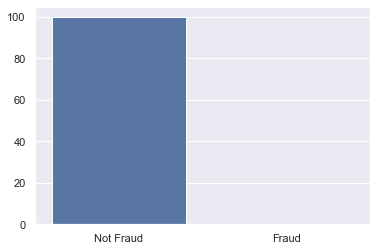

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

data = pd.Series([normal_share,fraud_share],index=['Not Fraud','Fraud'])
g=sns.barplot(data.index, data.values)

In [10]:
data.head() # Data in percentage

Not Fraud    99.827251
Fraud         0.172749
dtype: float64

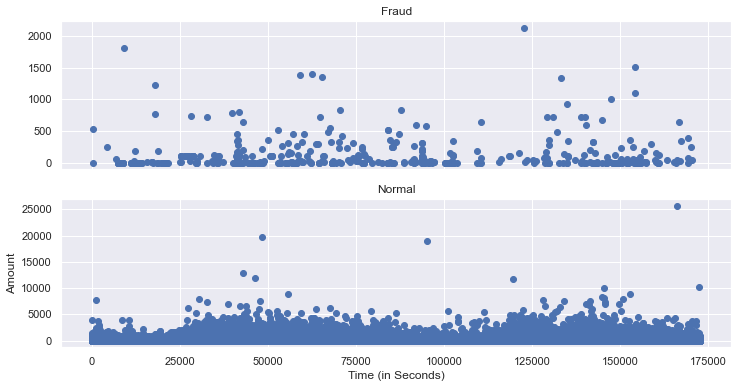

In [11]:
# Create a scatter plot to observe the distribution of classes with time and Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [12]:
# Currenlty not dropping any columns, since data is already PCA.
# Reducing columing here will not be appropriate as elimating the real feature.

### Splitting the data into train & test data

In [13]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


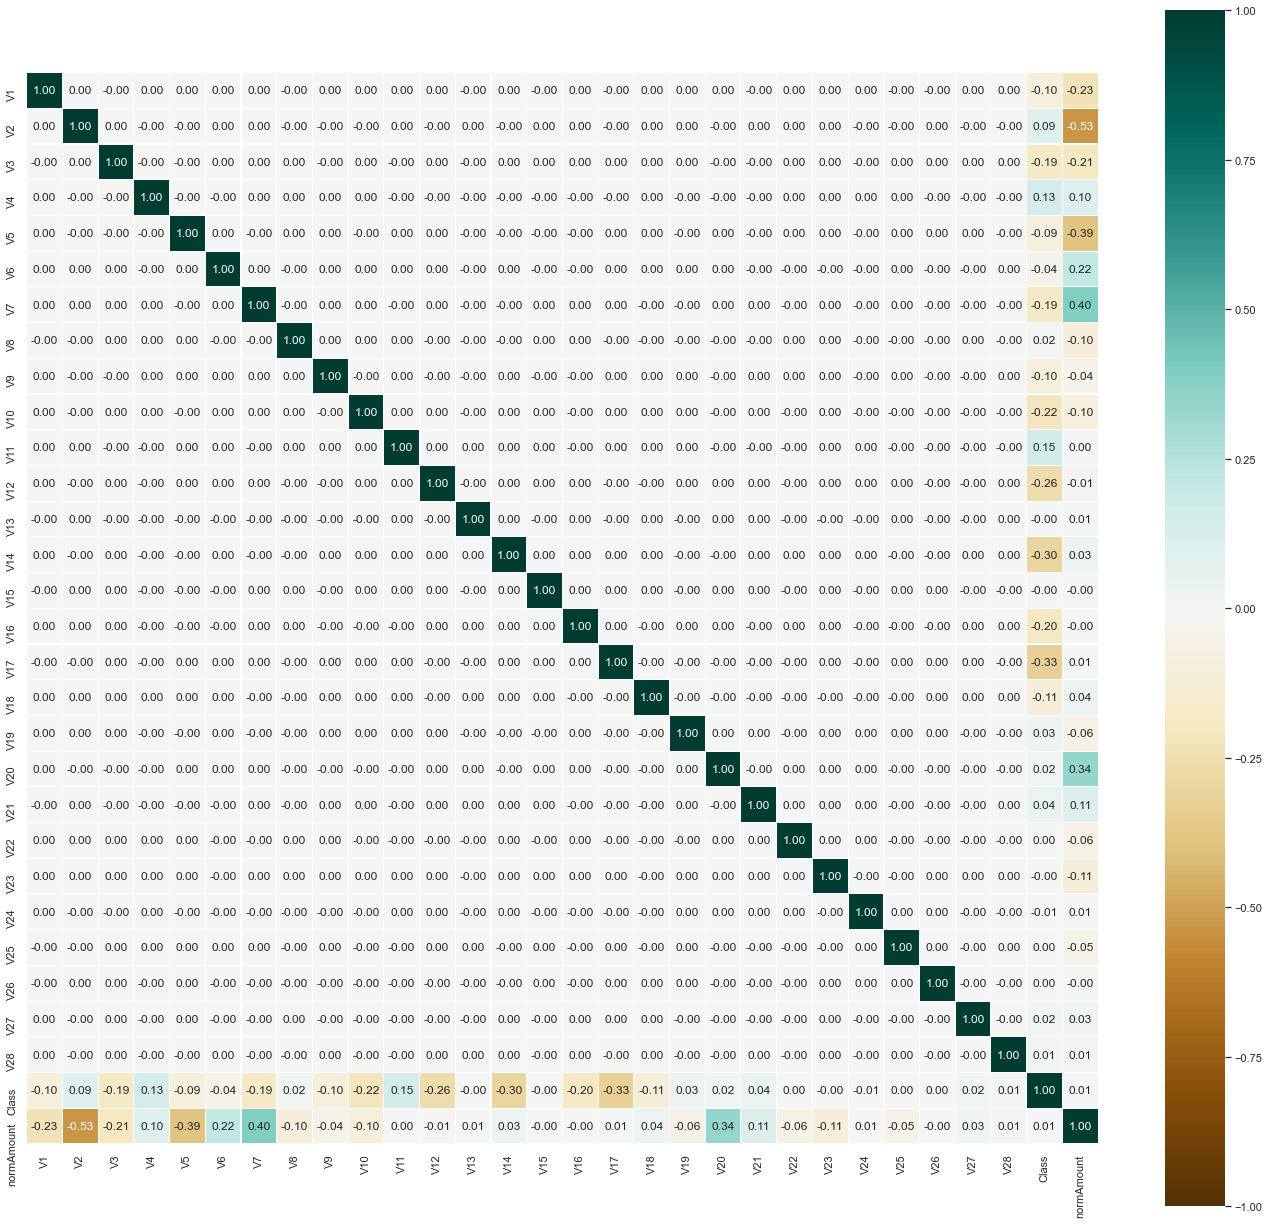

In [14]:
#Checking correlational with the data, although PCA automatically remove the correlation between the features.
colormap = plt.cm.BrBG

plt.figure(figsize=(24,22))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, vmin= -1.0,
            square=True, cmap = colormap, linecolor='white', annot=True,fmt='.2f')
plt.show()

### Splitting the data

In [15]:
y = df["Class"].values # transforming the values in array
X = df.drop(["Class"], axis=1).values #Setting the X to do the split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

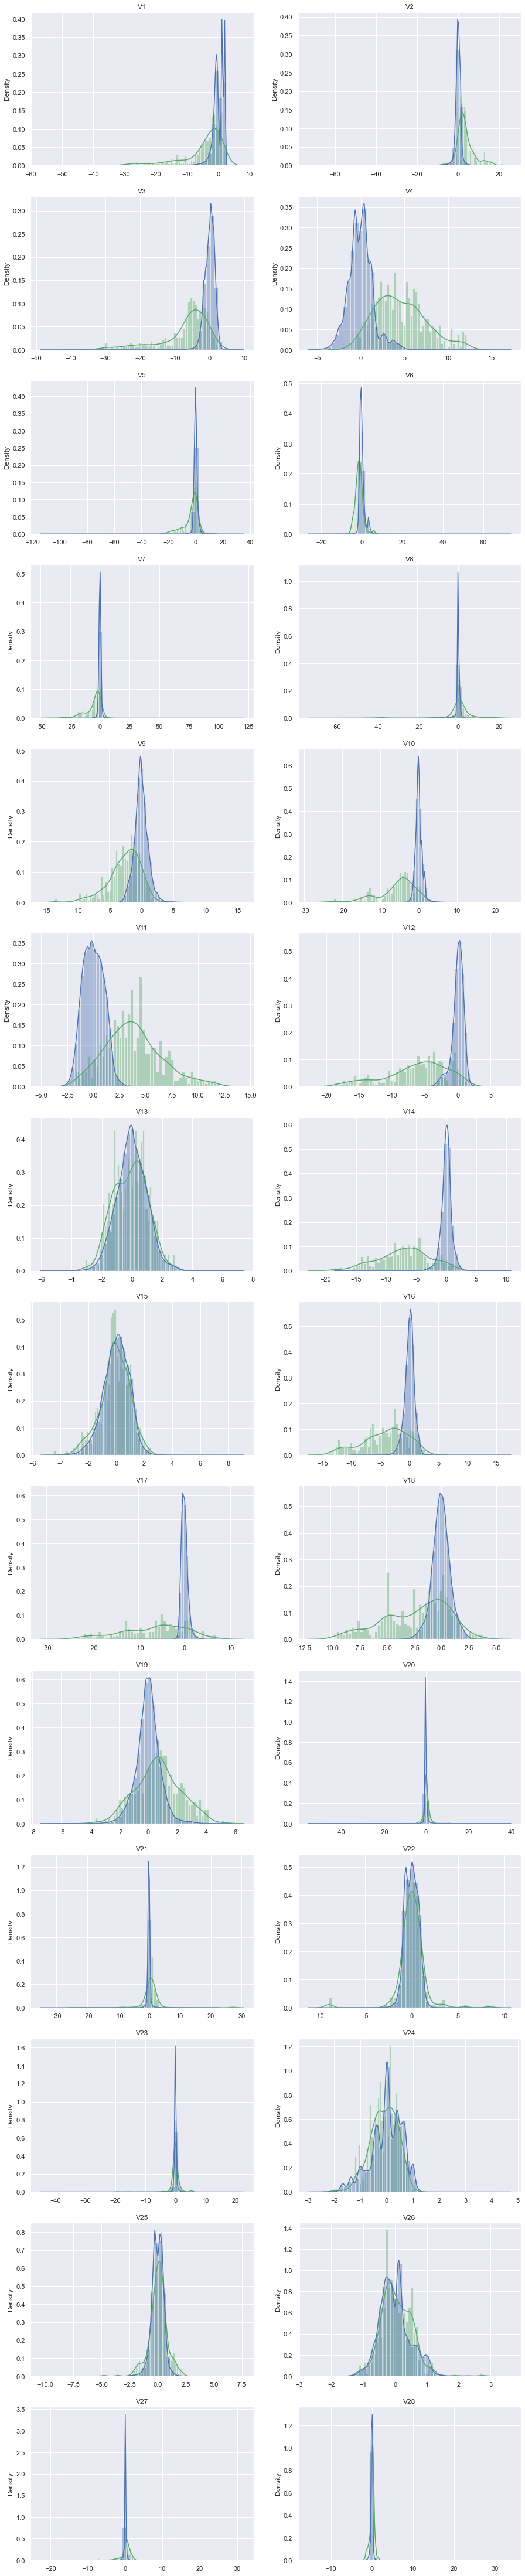

In [18]:
# plot the histogram of a variable from the dataset to see the skewness

columns = df.columns
columns = columns.drop(['Class','normAmount'])

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') # Green
    sns.distplot(df[col][normals], bins = 50, color='b') # Blue
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [19]:
y_train.reshape(-1, 1).shape

(199364, 1)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
from sklearn.preprocessing import PowerTransformer

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt_X = PowerTransformer(copy=False)
pt_X.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt_X.transform(X_train)    ## Then apply on all data
X_test_pt = pt_X.transform(X_test)



In [21]:
# plot the histogram of a variable from the dataset again to see the result 
df_transform_X = pd.DataFrame(data = X_train_pt,columns=df.drop(["Class"], axis=1).columns)

In [22]:
df_transform_X['Class'] = y_train

In [23]:
df_transform_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-0.605880,0.956151,-0.403579,-0.120114,0.301469,-0.831189,0.593005,0.188185,-0.090810,-1.476086,-0.803474,-0.025982,0.221143,-1.568217,-0.997680,0.049006,1.711057,0.259145,-0.399444,-0.059015,0.125977,0.662083,-0.363190,-0.224058,-0.339100,1.196422,0.632853,0.613780,-0.606170,0
1,-0.683167,-0.358786,-0.106439,-1.529565,0.262249,0.647741,0.717858,-0.048139,-1.486440,0.287644,-0.448797,-0.865059,-0.430287,0.306145,-0.157003,-0.979769,-0.918603,1.934130,-0.595243,-0.756477,-0.538934,-0.882164,0.407671,-2.376692,-0.371030,1.786016,0.059794,0.024942,1.476897,0
2,1.355049,-0.049854,-1.168392,0.887239,0.400953,-0.441078,0.420874,-0.290904,0.106011,0.443165,0.364580,0.552766,-0.905576,0.911956,-1.207834,-0.539235,-0.577224,0.003786,0.240271,-0.359283,0.132470,0.489918,-0.118934,-0.738264,0.850014,-1.047003,-0.076788,-0.208189,-0.132602,0
3,0.315085,-1.255760,-0.171374,-1.834302,-1.438699,-0.982354,-0.306304,-0.294925,1.190649,-0.841389,-0.707094,-0.211027,-1.101959,0.183360,1.715984,-2.489657,0.525651,2.043061,0.424196,0.030965,-0.240074,-0.739692,-0.493030,0.573830,0.889365,-1.782488,0.093288,0.254335,1.880683,0
4,0.377683,-0.112448,0.144757,0.980338,-0.252579,-0.328499,0.271077,-0.263797,-0.180126,-0.032006,0.354700,1.281463,1.279442,0.085472,1.167226,-0.393878,-0.211669,-0.905962,-1.246958,0.233937,0.310987,0.626101,-0.297610,0.717511,1.071263,-0.559633,0.032762,0.159786,1.407851,0


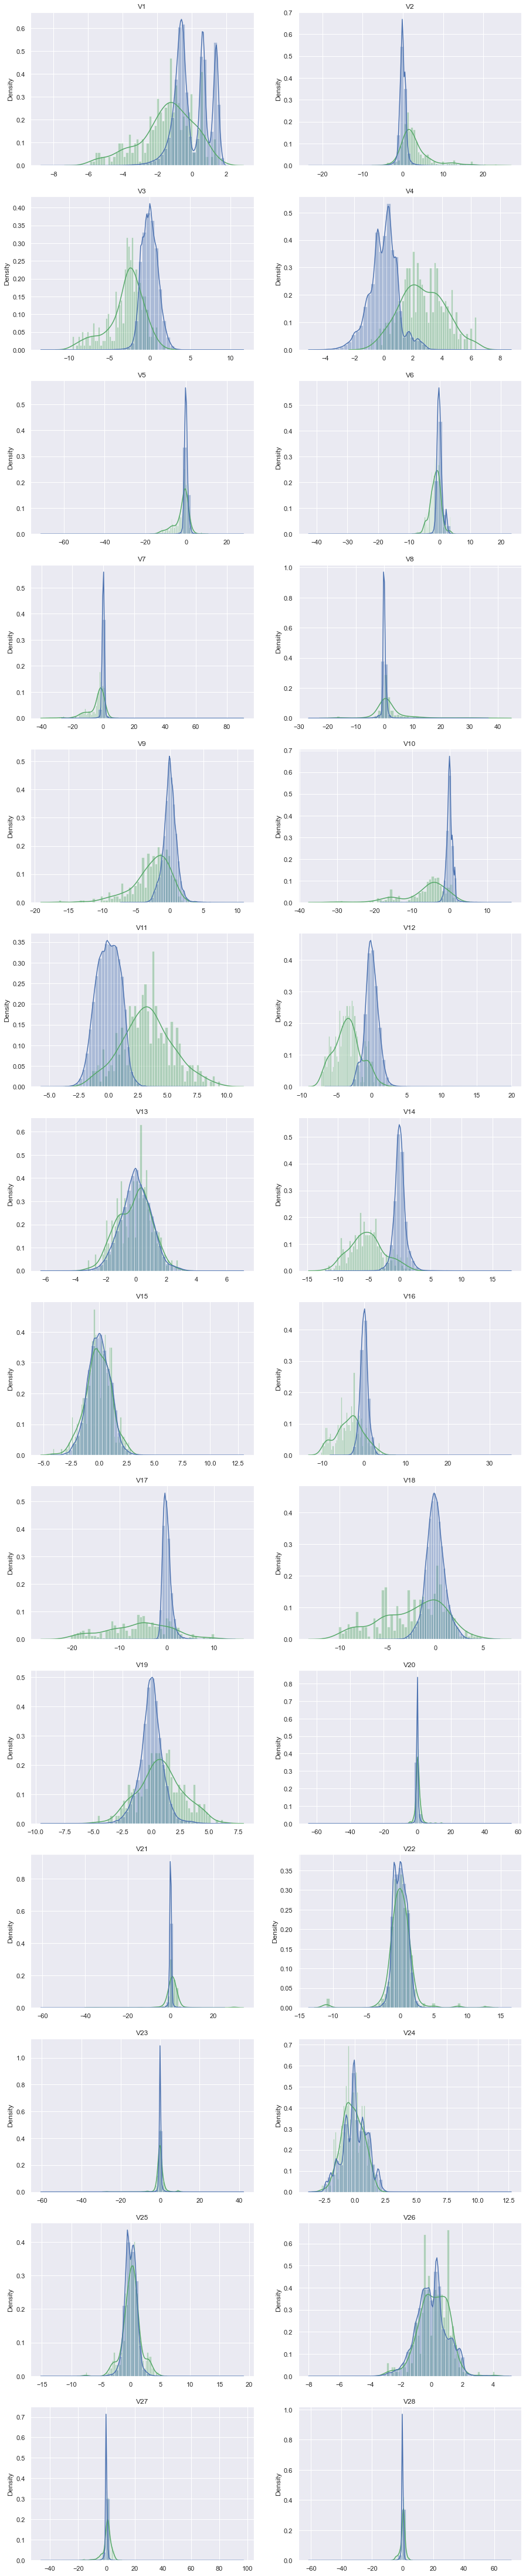

In [24]:
columns = df_transform_X.columns
columns = columns.drop(['normAmount','Class'])

frauds = df_transform_X.Class == 1
normals = df_transform_X.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_transform_X[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_transform_X[col][frauds], bins = 50, color='g') # Green
    sns.distplot(df_transform_X[col][normals], bins = 50, color='b') # Blue
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

 We are comparing the 2 data after before Power Transformer and after it. We can see some spikes reduce to normal distribution.

## Model Building

We would following an differnt aproach here.
- Build different models on the imbalanced dataset and see the result
- Then building a different models using Sampling Technique as data is highly imbalance
- `RandomUnderSampling`
- `RandomOverSampling`
- `SMOTE`
- `ADASYN`
- We will Hyperparameter tune the model using both coarse and fine tuning.
- We will experiment on Cross Validation using 2 values i.e. [2,5].

### **1. Logistic Regression**

In [25]:
# Importing All model and metrics library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [26]:
LRmodel = LogisticRegression()

In [27]:
cv_num = [2,5] #--> list of values

 - Since this is imbalance dataset **cv = 2** will work better than **cv = 5**. But lets just experiment and test the hypothesis.

In [25]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
LRmodel = LogisticRegression()

In [23]:
#perform both cross validation and hyperparameter for coarse tuning
LRgrid_list = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search.fit(X_train , y_train)
    y_pred_cv = LR_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search.best_params_,'Train AUC-ROC Score':LR_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list = LRgrid_list.append(dict,ignore_index=True)


Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.971, total=   0.4s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=0.001, score=0.976, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.972, total=   0.5s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.981, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   0.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.973, total=   0.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.978, total=   0.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.973, total=   0.6s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    8.0s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.976, total=   0.5s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................. C=0.001, score=0.984, total=   0.5s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ............................. C=0.001, score=0.958, total=   0.5s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.984, total=   0.5s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.967, total=   0.5s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.978, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.981, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.965, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   32.7s finished


In [24]:
LRgrid_list.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 0.01},0.976705,0.787104
1,5,{'C': 0.01},0.976132,0.787104


In [25]:
#fine tuning hyperparameter grid
LRparam_grid_fine = {
    'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
}


In [26]:
#perform both cross validation and hyperparameter for fine tuning
LRgrid_list_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search.fit(X_train , y_train)
    y_pred_cv = LR_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search.best_params_,'Train AUC-ROC Score':LR_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_fine = LRgrid_list_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.981, total=   0.4s
[CV] C=0.02 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.02, score=0.973, total=   0.4s
[CV] C=0.02 ..........................................................
[CV] .............................. C=0.02, score=0.981, total=   0.4s
[CV] C=0.03 ..........................................................
[CV] .............................. C=0.03, score=0.973, total=   0.5s
[CV] C=0.03 ..........................................................
[CV] .............................. C=0.03, score=0.981, total=   0.5s
[CV] C=0.04 ..........................................................
[CV] .............................. C=0.04, score=0.973, total=   0.5s
[CV] C=0.04 ..........................................................
[CV] .............................. C=0.04, score=0.981, total=   0.5s
[CV] C=0.05 ..........................................................
[CV] .............................. C=0.05, score=0.973, total=   0.5s
[CV] C=0.05 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.0s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.978, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.981, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.965, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.970, total=   0.8s
[CV] C=0.02 ..........................................................
[CV] .............................. C=0.02, score=0.978, total=   0.9s
[CV] C=0.02 ..........................................................
[CV] .............................. C=0.02, score=0.981, total=   0.8s
[CV] C=0.02 ..........................................................
[CV] .............................. C=0.02, score=0.966, total=   0.8s
[CV] C=0.02 ..........................................................
[CV] .............................. C=0.02, score=0.985, total=   0.8s
[CV] C=0.02 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   40.8s finished


In [27]:
#print the Fine Tune Hyperparameter Train Test Score over AUC-ROC metrics
LRgrid_list_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 0.03},0.977194,0.797239
1,5,{'C': 0.01},0.976132,0.787104


<AxesSubplot:>

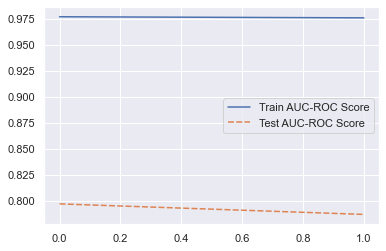

In [28]:
sns.lineplot(data=LRgrid_list_fine.iloc[:,2:])

### **2. KNN**

In [29]:
KNNparam_grid = { 'n_neighbors' : [5,10,15,20,25,30,35,40]}
KNNmodel = KNeighborsClassifier()

In [30]:
#perform both cross validation and hyperparameter for coarse tuning
KNNgrid_list = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search.fit(X_train , y_train)
    y_pred_cv = KNN_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search.best_params_,'Train AUC-ROC Score':KNN_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list = KNNgrid_list.append(dict,ignore_index=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 36.4min remaining: 46.8min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 74.2min remaining: 17.1min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 76.1min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 95.1min finished


In [31]:
KNNgrid_list.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 35},0.933967,0.868126
1,5,{'n_neighbors': 40},0.932491,0.864748


In [32]:
#perform fine tuning hyperparameter
KNNparam_grid_fine = { 'n_neighbors' : [31,32,33,34]}


In [33]:
#perform both cross validation and hyperparameter for fine tuning
KNNgrid_list_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search.fit(X_train , y_train)
    y_pred_cv = KNN_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search.best_params_,'Train AUC-ROC Score':KNN_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_fine = KNNgrid_list_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] n_neighbors=31 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... n_neighbors=31, score=0.921, total=14.6min
[CV] n_neighbors=31 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.6min remaining:    0.0s


[CV] ...................... n_neighbors=31, score=0.947, total=13.9min
[CV] n_neighbors=32 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 28.5min remaining:    0.0s


[CV] ...................... n_neighbors=32, score=0.921, total=17.8min
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.947, total=15.6min
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.921, total=15.9min
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.947, total=14.1min
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.921, total=15.0min
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.947, total=14.2min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 121.0min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_neighbors=31 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... n_neighbors=31, score=0.927, total= 9.8min
[CV] n_neighbors=31 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.8min remaining:    0.0s


[CV] ...................... n_neighbors=31, score=0.934, total= 9.2min
[CV] n_neighbors=31 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.0min remaining:    0.0s


[CV] ...................... n_neighbors=31, score=0.920, total= 8.8min
[CV] n_neighbors=31 ..................................................
[CV] ...................... n_neighbors=31, score=0.942, total= 8.7min
[CV] n_neighbors=31 ..................................................
[CV] ...................... n_neighbors=31, score=0.926, total= 7.9min
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.927, total= 8.3min
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.934, total= 8.3min
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.920, total= 8.0min
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.942, total= 7.9min
[CV] n_neighbors=32 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 169.0min finished


In [34]:
KNNgrid_list_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 31},0.934012,0.868126
1,5,{'n_neighbors': 33},0.931110,0.868126


<AxesSubplot:>

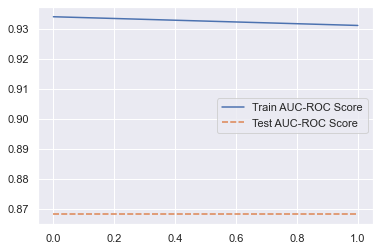

In [35]:
sns.lineplot(data=KNNgrid_list_fine.iloc[:,2:])

### **3. Decision Tree**

In [43]:
DTparam_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 20, 25, 30]
              }
DTmodel = DecisionTreeClassifier()

In [44]:
#perform both cross validation and hyperparameter for coarse tuning
DTgrid_list = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search.fit(X_train , y_train)
    y_pred_cv = DT_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search.best_params_,'Train AUC-ROC Score':DT_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list = DTgrid_list.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   28.9s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


In [45]:
DTgrid_list.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 40, 'max_depth': 5, 'criterion': 'entropy'}",0.925009,0.891798
1,5,"{'min_samples_split': 40, 'max_depth': 5, 'criterion': 'entropy'}",0.930974,0.891798


In [69]:
DTparam_grid_fine = {"criterion": ["gini", "entropy"],
              "min_samples_split": [35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
              "max_depth": [2, 3, 4, 5, 6, 7, 8, 9]
              }

In [70]:
#perform both cross validation and hyperparameter for fine tuning
DTgrid_list_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search.fit(X_train , y_train)
    y_pred_cv = DT_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search.best_params_,'Train AUC-ROC Score':DT_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_fine = DTgrid_list_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] min_samples_split=39, max_depth=7, criterion=gini ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=39, max_depth=7, criterion=gini, score=0.897, total=   2.8s
[CV] min_samples_split=39, max_depth=7, criterion=gini ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  min_samples_split=39, max_depth=7, criterion=gini, score=0.893, total=   2.8s
[CV] min_samples_split=36, max_depth=5, criterion=gini ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV]  min_samples_split=36, max_depth=5, criterion=gini, score=0.869, total=   2.0s
[CV] min_samples_split=36, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=36, max_depth=5, criterion=gini, score=0.881, total=   2.0s
[CV] min_samples_split=35, max_depth=3, criterion=entropy ............
[CV]  min_samples_split=35, max_depth=3, criterion=entropy, score=0.924, total=   1.8s
[CV] min_samples_split=35, max_depth=3, criterion=entropy ............
[CV]  min_samples_split=35, max_depth=3, criterion=entropy, score=0.933, total=   1.7s
[CV] min_samples_split=41, max_depth=9, criterion=entropy ............
[CV]  min_samples_split=41, max_depth=9, criterion=entropy, score=0.923, total=   3.9s
[CV] min_samples_split=41, max_depth=9, criterion=entropy ............
[CV]  min_samples_split=41, max_depth=9, criterion=entropy, score=0.932, total=   4.4s
[CV] min_samples_split=37, max_depth=2, criterion=entropy ............
[CV]  min_samples_split=37, max_depth=2, criterion=entropy

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   51.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=36, max_depth=2, criterion=gini ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=36, max_depth=2, criterion=gini, score=0.862, total=   1.3s
[CV] min_samples_split=36, max_depth=2, criterion=gini ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  min_samples_split=36, max_depth=2, criterion=gini, score=0.848, total=   1.4s
[CV] min_samples_split=36, max_depth=2, criterion=gini ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  min_samples_split=36, max_depth=2, criterion=gini, score=0.848, total=   1.4s
[CV] min_samples_split=36, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=36, max_depth=2, criterion=gini, score=0.891, total=   1.4s
[CV] min_samples_split=36, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=36, max_depth=2, criterion=gini, score=0.868, total=   1.3s
[CV] min_samples_split=42, max_depth=3, criterion=gini ...............
[CV]  min_samples_split=42, max_depth=3, criterion=gini, score=0.920, total=   2.0s
[CV] min_samples_split=42, max_depth=3, criterion=gini ...............
[CV]  min_samples_split=42, max_depth=3, criterion=gini, score=0.906, total=   2.0s
[CV] min_samples_split=42, max_depth=3, criterion=gini ...............
[CV]  min_samples_split=42, max_depth=3, criterion=gini, score=0.891, total=   2.0s
[CV] min_samples_split=42, max_depth=3, criterion=gini ...............
[CV]  min_samples_split=42, max_depth=3, criterion=gini, score=0.935, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


In [71]:
DTgrid_list_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 35, 'max_depth': 3, 'criterion': 'entropy'}",0.928518,0.868155
1,5,"{'min_samples_split': 44, 'max_depth': 7, 'criterion': 'entropy'}",0.937851,0.871510


<AxesSubplot:>

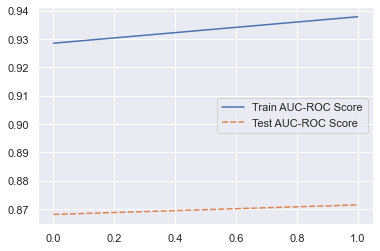

In [72]:
sns.lineplot(data=DTgrid_list_fine.iloc[:,2:])

### **4. Random Forest**

In [50]:
RFparam_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
 }
RFmodel = RandomForestClassifier()

In [51]:
#perform both cross validation and hyperparameter for coarse tuning
RFgrid_list = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search.fit(X_train , y_train)
    y_pred_cv = RF_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search.best_params_,'Train AUC-ROC Score':RF_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list = RFgrid_list.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 24.6min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 306.1min finished


In [52]:
RFgrid_list.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}",0.971576,0.878314
1,5,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}",0.972548,0.891851


In [65]:
RFparam_grid_fine = {'bootstrap': [True, False],
 'max_depth': [20, 21, 22, 23, 24, 25],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [800, 810, 820, 830, 840, 850]
 }

In [66]:
#perform both cross validation and hyperparameter for fine tuning
RFgrid_list_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search.fit(X_train , y_train)
    y_pred_cv = RF_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search.best_params_,'Train AUC-ROC Score':RF_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_fine = RFgrid_list_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=23, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=23, bootstrap=False, score=0.954, total=19.1min
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=23, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.1min remaining:    0.0s


[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=23, bootstrap=False, score=0.961, total=15.9min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 34.9min remaining:    0.0s


[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.951, total= 8.4min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.974, total= 8.1min
[CV] n_estimators=850, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=850, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=24, bootstrap=False, score=0.958, total=15.8min
[CV] n_estimators=850, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=850, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=24, bootstrap=False, score=0.971, total=17.5min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 290.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False, score=0.971, total=33.9min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.9min remaining:    0.0s


[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False, score=0.972, total=29.6min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 63.5min remaining:    0.0s


[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False, score=0.961, total=26.3min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False 
[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False, score=0.970, total=27.6min
[CV] n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False 
[CV]  n_estimators=810, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=22, bootstrap=False, score=0.971, total=26.7min
[CV] n_estimators=830, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=830, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=24, bootstrap=False, score=0.968, total=28.6min
[CV] n_estimators=830, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_dep

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 1200.5min finished


In [67]:
RFgrid_list_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}",0.967522,0.888461
1,5,"{'n_estimators': 800, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 21, 'bootstrap': False}",0.974247,0.891845


<AxesSubplot:>

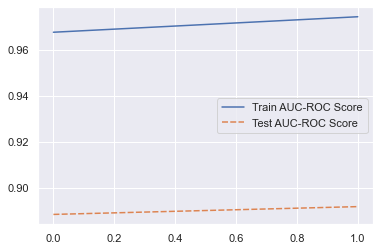

In [68]:
sns.lineplot(data=RFgrid_list_fine.iloc[:,2:])

### **5. XGBoost**

In [57]:
XGCparam_grid = {
        'learning_rate': [0.01,0.05,0.1],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(100,1001,100)),
        "alpha":[0, 2, 4, 6, 8]
        }
XGCmodel = XGBClassifier()

In [58]:
#perform both cross validation and hyperparameter for coarse tuning
XGCgrid_list = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search.fit(X_train , y_train)
    y_pred_cv = XGC_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search.best_params_,'Train AUC-ROC Score':XGC_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list = XGCgrid_list.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  5.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.5min finished


[07:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.1min finished


[07:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
XGCgrid_list.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.4, 'alpha': 2}",0.977038,0.898619
1,5,"{'subsample': 0.4, 'n_estimators': 800, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.3, 'alpha': 0}",0.974490,0.898619


In [60]:
XGCparam_grid_fine = {
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(700,901,20)),
        "alpha":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        }

In [61]:
#perform both cross validation and hyperparameter for fine tuning
XGCgrid_list_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search.fit(X_train , y_train)
    y_pred_cv = XGC_search.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search.best_params_,'Train AUC-ROC Score':XGC_search.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_fine = XGCgrid_list_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=8, learning_rate=0.9, gamma=0.6, colsample_bytree=0.7, alpha=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=8, learning_rate=0.9, gamma=0.6, colsample_bytree=0.7, alpha=6, score=0.975, total=  37.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=8, learning_rate=0.9, gamma=0.6, colsample_bytree=0.7, alpha=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.6s remaining:    0.0s


[07:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=8, learning_rate=0.9, gamma=0.6, colsample_bytree=0.7, alpha=6, score=0.977, total=  40.4s
[CV] subsample=0.7, n_estimators=860, min_child_weight=9, max_depth=4, learning_rate=0.4, gamma=0.9, colsample_bytree=0.2, alpha=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[07:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, n_estimators=860, min_child_weight=9, max_depth=4, learning_rate=0.4, gamma=0.9, colsample_bytree=0.2, alpha=4, score=0.971, total=  29.0s
[CV] subsample=0.7, n_estimators=860, min_child_weight=9, max_depth=4, learning_rate=0.4, gamma=0.9, colsample_bytree=0.2, alpha=4 
[07:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, n_estimators=860, min_child_weight=9, max_depth=4, learning_rate=0.

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 11.5min finished


[08:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[08:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2, score=0.988, total= 1.0min
[CV] subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[08:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2, score=0.985, total= 1.1min
[CV] subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[08:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2, score=0.944, total= 1.0min
[CV] subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.6, colsample_bytree=0.1, alpha=2 
[08:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, n_estimators=700, min_child_weight=5, max_depth=9, learning_rate=0.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 55.6min finished


[09:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
XGCgrid_list_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.8, 'n_estimators': 900, 'min_child_weight': 6, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8, 'alpha': 1}",0.976437,0.905376
1,5,"{'subsample': 0.5, 'n_estimators': 840, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.8, 'gamma': 0.8, 'colsample_bytree': 0.9, 'alpha': 8}",0.976769,0.885100


<AxesSubplot:>

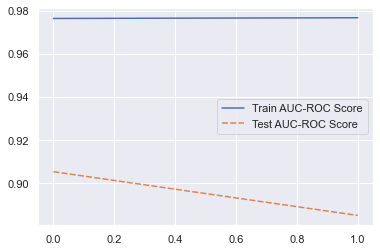

In [63]:
sns.lineplot(data=XGCgrid_list_fine.iloc[:,2:])

##### Best fine accuracy model

In [84]:
All_model_accuracy = pd.DataFrame()
All_model_accuracy['CV'] = [2, 5]
All_model_accuracy['Logistic Train Accuracy'] = LRgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['Logistic Test Accuracy'] = LRgrid_list_fine['Test AUC-ROC Score'].to_list()

All_model_accuracy['KNN Train Accuracy'] = KNNgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['KNN Test Accuracy'] = KNNgrid_list_fine['Test AUC-ROC Score'].to_list()

All_model_accuracy['SVM Train Accuracy'] = SVCgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['SVM Test Accuracy'] = SVCgrid_list_fine['Test AUC-ROC Score'].to_list()

All_model_accuracy['DecisionTree Train Accuracy'] = DTgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['DecisionTree Test Accuracy'] = DTgrid_list_fine['Test AUC-ROC Score'].to_list()

All_model_accuracy['RandomForest Train Accuracy'] = RFgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['RandomForest Test Accuracy'] = RFgrid_list_fine['Test AUC-ROC Score'].to_list()

All_model_accuracy['XGBoost Train Accuracy'] = XGCgrid_list_fine['Train AUC-ROC Score'].to_list()
All_model_accuracy['XGBoost Test Accuracy'] = XGCgrid_list_fine['Test AUC-ROC Score'].to_list()

In [85]:
All_model_accuracy.head()

,CV,Logistic Train Accuracy,Logistic Test Accuracy,KNN Train Accuracy,KNN Test Accuracy,SVM Train Accuracy,SVM Test Accuracy,DecisionTree Train Accuracy,DecisionTree Test Accuracy,RandomForest Train Accuracy,RandomForest Test Accuracy,XGBoost Train Accuracy,XGBoost Test Accuracy
0,2,0.977194,0.797239,0.934012,0.868126,0.966419,0.550676,0.928518,0.868155,0.967522,0.888461,0.976437,0.905376
1,5,0.976132,0.787104,0.931110,0.868126,0.968240,0.550676,0.937851,0.871510,0.974247,0.891845,0.976769,0.885100


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

#### Best accuracy we received in ***XG Boost*** model.

In [62]:
bestXGC_grid = {'subsample': [0.8], 'n_estimators': [900], 'min_child_weight': [6], 'max_depth': [9], 'learning_rate': [0.1], 'gamma': [0.5], 'colsample_bytree': [0.8], 'alpha': [1], 'seed' : [10]}
xgc_clf = XGBClassifier()  #initialise the model with optimum hyperparameters
clf = RandomizedSearchCV(xgc_clf, param_distributions=bestXGC_grid,scoring='roc_auc', refit = True, verbose = 3, cv=2, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


[01:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [63]:
y_final_pred = clf.predict(X_test)

In [64]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_final_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_final_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_final_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_final_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_final_pred)))

Accuracy :0.99960
AUC : 0.90537
Precision : 0.95238
Recall : 0.81081
F1 : 0.87591


AUC -  0.9053702333554612 



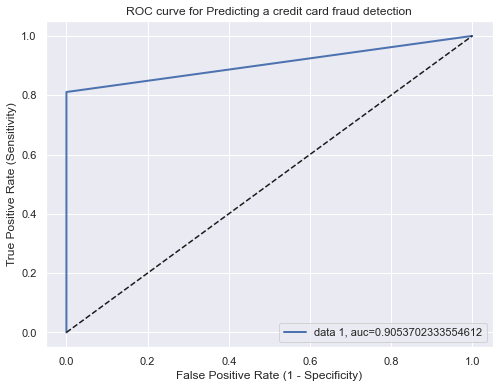

In [65]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_final_pred)

auc = metrics.roc_auc_score(y_test, y_final_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.876


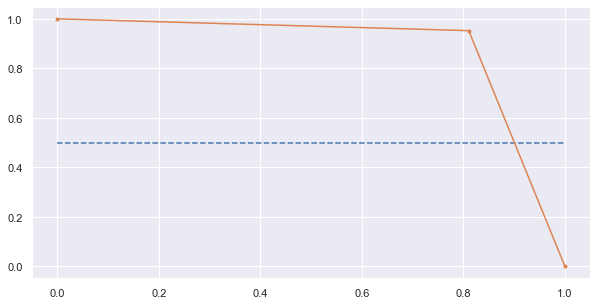

In [66]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_final_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_final_pred)
print('f1=%.3f' % (f1))

# plot no skill
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


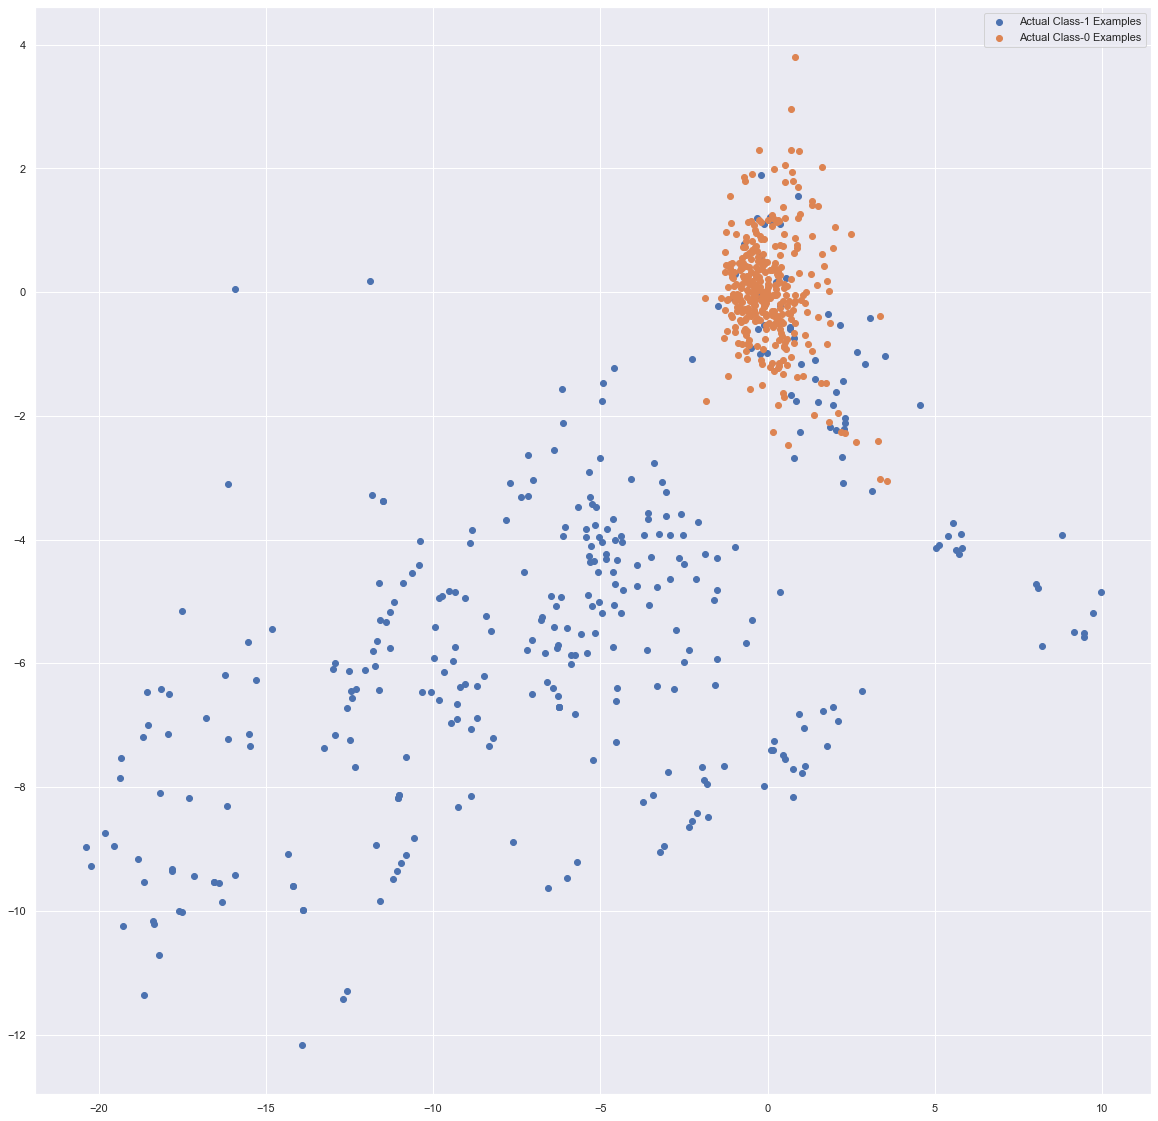

In [67]:
var_imp = []
clf = clf.best_estimator_
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- RandomUnderSamlping
- RandomOverSampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Logistic Regression

In [28]:
cv_num =  [2, 5] #--> Since this time by balancing the dataset the cv = 5 will work better then cv = 2.

In [29]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
LRmodel = LogisticRegression()

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [30]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary

### Print the class distribution after applying RandomUnderSampler 

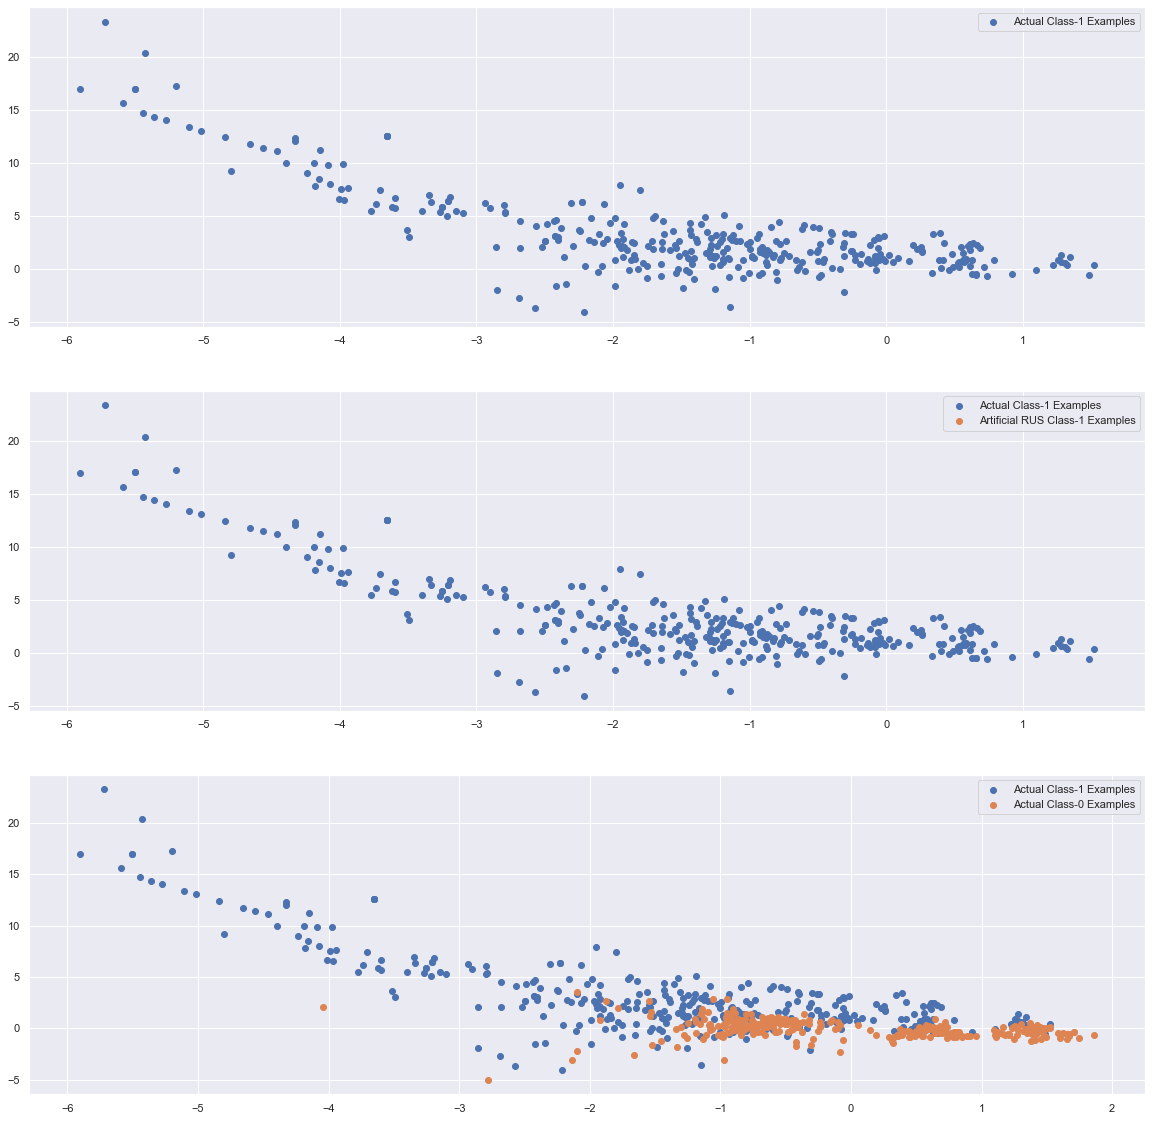

In [31]:
### Print the class distribution after applying RandomUnderSampler 

import warnings
warnings.filterwarnings("ignore")


sm = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from RandomUnderSampler are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from RandomUnderSampler, we do
X_train_rus_1 = X_train_rus[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_rus_1[:X_train_1.shape[0], 0], X_train_rus_1[:X_train_1.shape[0], 1],
            label='Artificial RUS Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying RandomOverSampler 

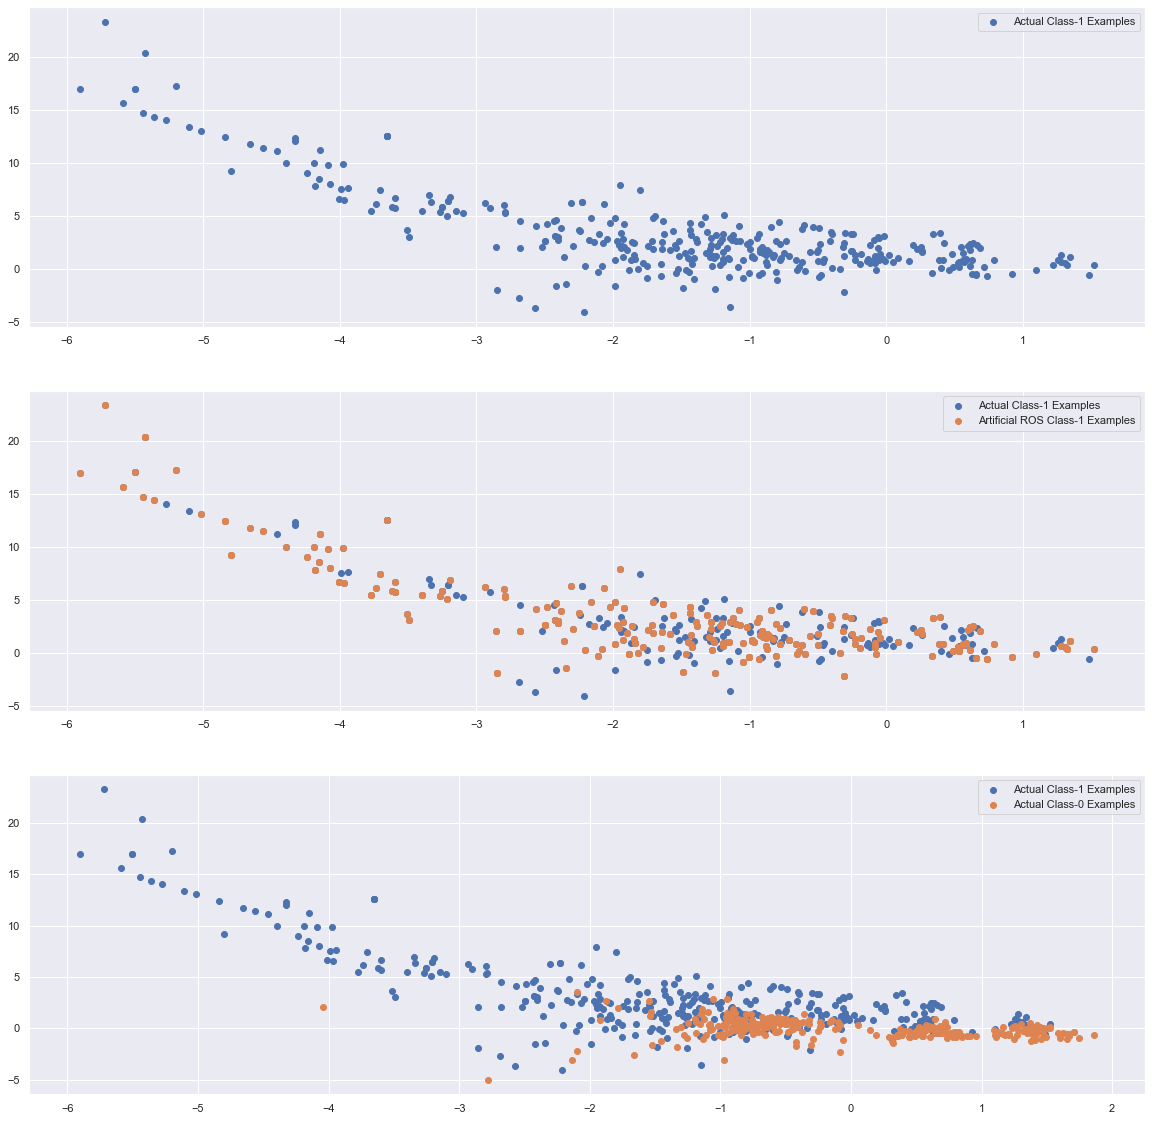

In [32]:
### Print the class distribution after applying RandomOverSampler 

import warnings
warnings.filterwarnings("ignore")


sm = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_ros_1 = X_train_ros[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1[:X_train_1.shape[0], 0], X_train_ros_1[:X_train_1.shape[0], 1],
            label='Artificial ROS Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying SMOTE 

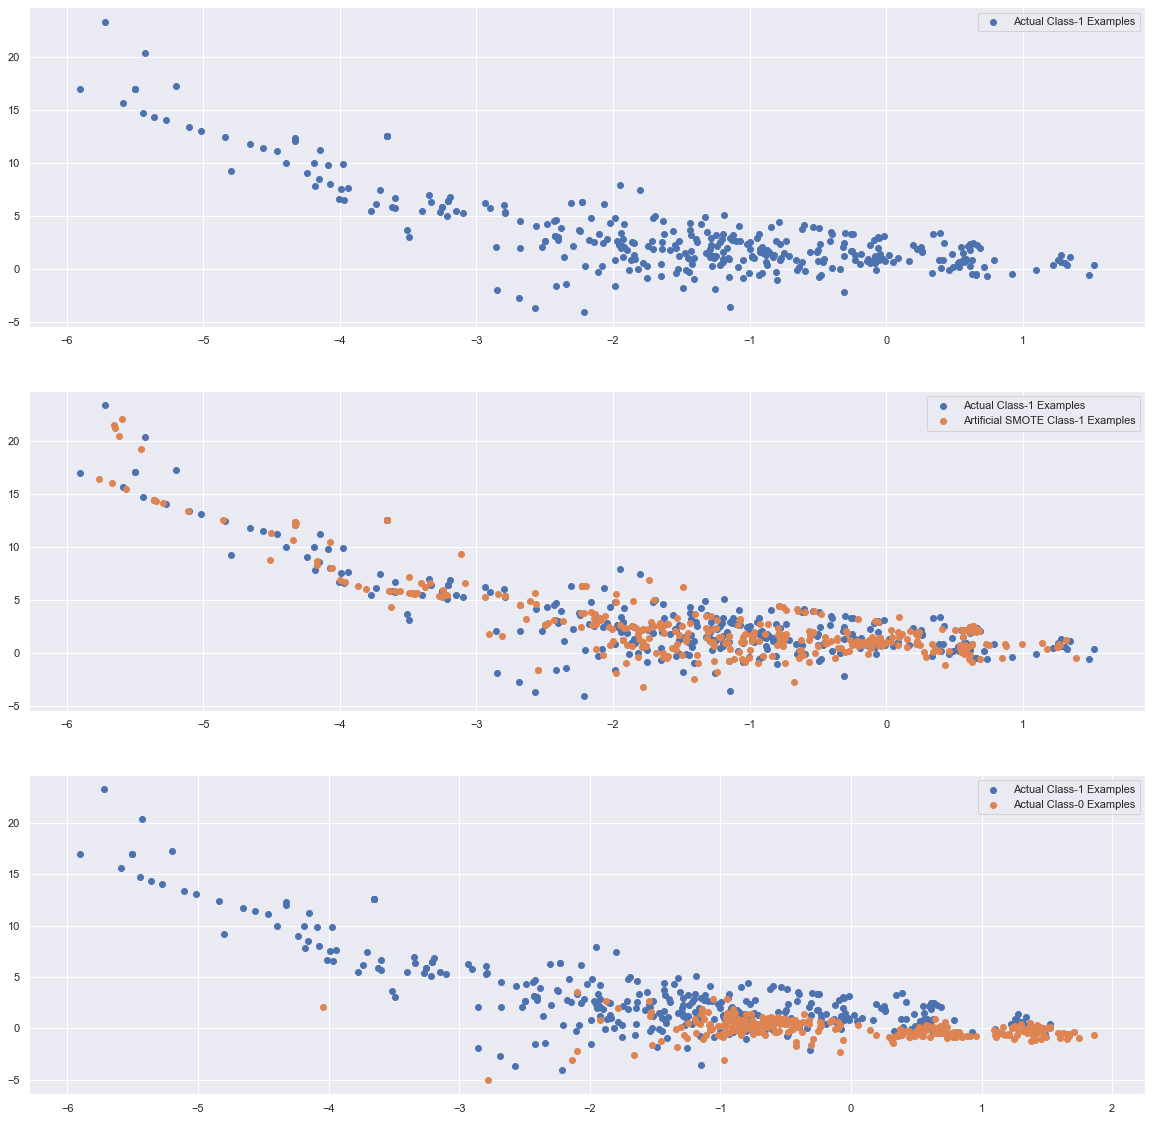

In [33]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

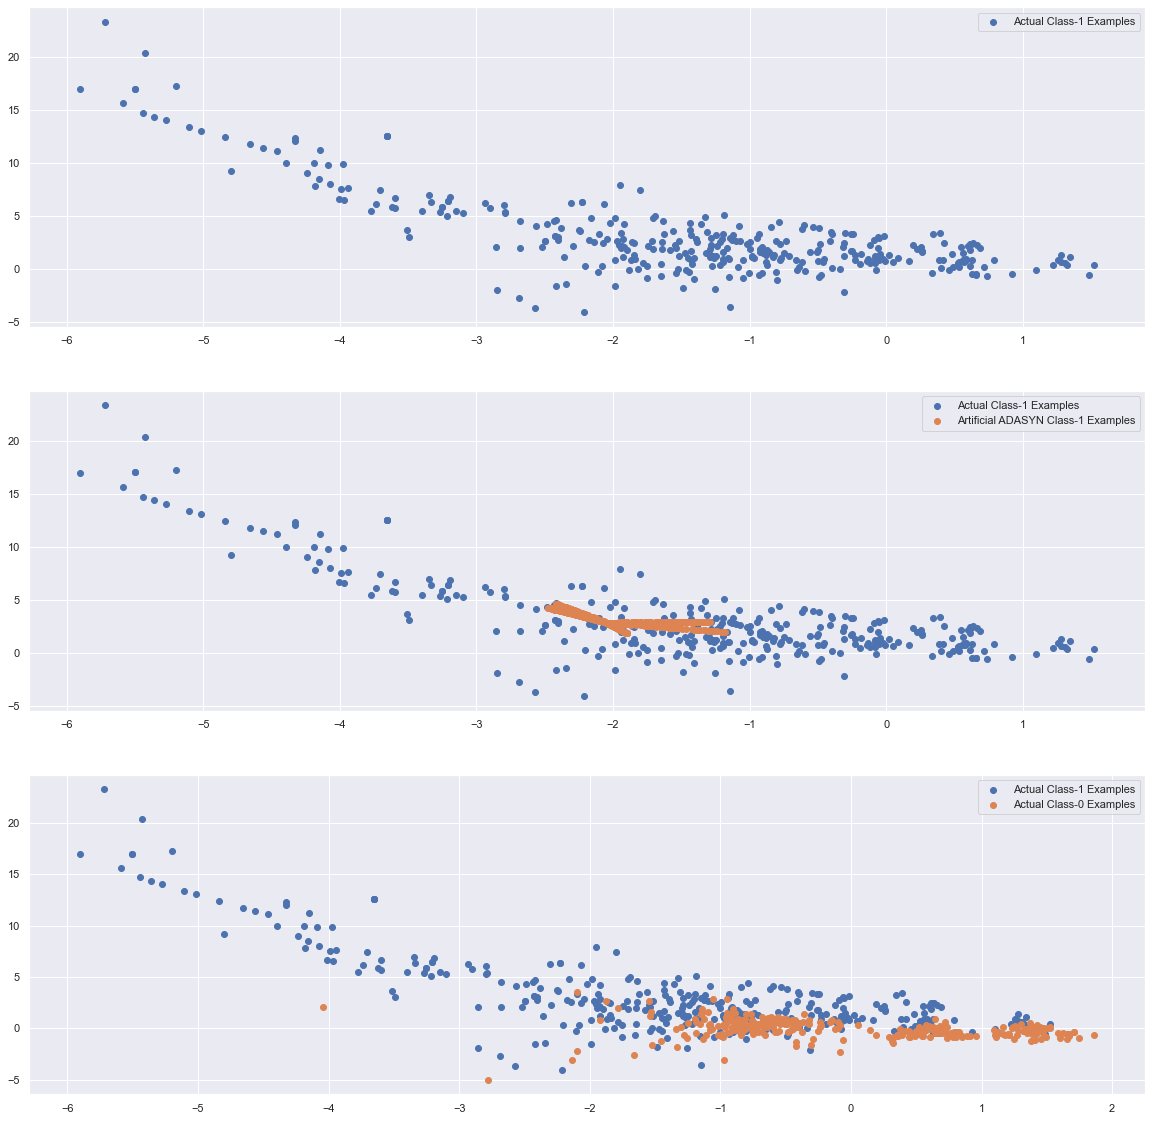

In [34]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on RandomUnderSampler, RandomOverSampler, SMOTE, ADASYN

In [35]:
# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Oversampling only on train
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# SMOTE only on train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#ADASYN only on train
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [36]:
print('RUS Resampled dataset shape %s' % Counter(y_train_rus))
print('ROS: Resampled dataset shape %s' % Counter(y_train_ros))
print('SMOTE: Resampled dataset shape %s' % Counter(y_train_smote))
print('ADASYN: Resampled dataset shape %s' % Counter(y_train_adasyn))

RUS Resampled dataset shape Counter({0: 344, 1: 344})
ROS: Resampled dataset shape Counter({0: 199020, 1: 199020})
SMOTE: Resampled dataset shape Counter({0: 199020, 1: 199020})
ADASYN: Resampled dataset shape Counter({1: 199039, 0: 199020})


In [130]:
#perform both cross validation and hyperparameter for coarse tuning
LRgrid_list_rus = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_rus = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_rus.fit(X_train_rus , y_train_rus)
    y_pred_cv = LR_search_rus.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_rus.best_params_,'Train AUC-ROC Score':LR_search_rus.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_rus = LRgrid_list_rus.append(dict,ignore_index=True)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.975, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.970, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.983, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.985, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=100, score=0.964, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.983, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.962, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.983, total=   0.0s
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.977, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.980, total=   0.0s

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.942, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.982, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.972, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.983, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.951, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.988, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.0s finished


In [139]:
LRgrid_list_rus.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 0.1},0.979093,0.940621
1,5,{'C': 0.1},0.977888,0.940621


In [131]:
#perform both cross validation and hyperparameter for coarse tuning
LRgrid_list_ros = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_ros = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_ros.fit(X_train_ros , y_train_ros)
    y_pred_cv = LR_search_ros.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_ros.best_params_,'Train AUC-ROC Score':LR_search_ros.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_ros = LRgrid_list_ros.append(dict,ignore_index=True)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.984, total=   1.2s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ............................. C=0.001, score=0.984, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.984, total=   2.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.985, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.984, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.985, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.984, total=   2.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.985, total=   1.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.984, total=   1.2s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   22.7s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.984, total=   1.6s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ............................. C=0.001, score=0.984, total=   2.2s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ............................. C=0.001, score=0.984, total=   2.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.984, total=   1.9s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.984, total=   2.6s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.984, total=   2.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.985, total=   3.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.985, total=   2.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.985, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


In [138]:
LRgrid_list_ros.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 1000},0.984640,0.943829
1,5,{'C': 1000},0.984662,0.943829


In [132]:
#perform both cross validation and hyperparameter for coarse tuning
LRgrid_list_smote = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_smote = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_smote.fit(X_train_smote , y_train_smote)
    y_pred_cv = LR_search_smote.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_smote.best_params_,'Train AUC-ROC Score':LR_search_smote.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_smote = LRgrid_list_smote.append(dict,ignore_index=True)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.985, total=   1.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............................. C=0.001, score=0.985, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.986, total=   1.5s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.986, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.986, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.986, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.986, total=   1.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.986, total=   1.7s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   21.7s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.985, total=   2.3s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ............................. C=0.001, score=0.986, total=   2.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] ............................. C=0.001, score=0.985, total=   2.2s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.986, total=   1.9s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.985, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   2.4s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   2.3s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   2.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.986, total=   2.5s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.4min finished


In [137]:
LRgrid_list_smote.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 1000},0.986222,0.942616
1,5,{'C': 1000},0.986231,0.942616


In [133]:
#perform both cross validation and hyperparameter for coarse tuning
LRgrid_list_adasyn = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_adasyn = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = LR_search_adasyn.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_adasyn.best_params_,'Train AUC-ROC Score':LR_search_adasyn.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_adasyn = LRgrid_list_adasyn.append(dict,ignore_index=True)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.934, total=   1.3s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ............................. C=0.001, score=0.948, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   1.8s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.950, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.951, total=   1.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.935, total=   1.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.951, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.935, total=   1.3s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   19.4s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.001, score=0.964, total=   1.6s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ............................. C=0.001, score=0.950, total=   1.9s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] ............................. C=0.001, score=0.898, total=   1.7s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.962, total=   1.8s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.940, total=   1.5s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.965, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.950, total=   2.4s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.905, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.964, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


In [136]:
LRgrid_list_adasyn.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 0.1},0.942881,0.929565
1,5,{'C': 1000},0.945466,0.929483


### Collective Result

In [134]:
LR_model_accuracy = pd.DataFrame()
LR_model_accuracy['CV'] = [2, 5]
LR_model_accuracy['RUS Logistic Train Accuracy'] = LRgrid_list_rus['Train AUC-ROC Score'].to_list()
LR_model_accuracy['RUS Logistic Test Accuracy'] = LRgrid_list_rus['Test AUC-ROC Score'].to_list()

LR_model_accuracy['ROS Logistic Train Accuracy'] = LRgrid_list_ros['Train AUC-ROC Score'].to_list()
LR_model_accuracy['ROS Logistic Test Accuracy'] = LRgrid_list_ros['Test AUC-ROC Score'].to_list()

LR_model_accuracy['SMOTE Logistic Train Accuracy'] = LRgrid_list_smote['Train AUC-ROC Score'].to_list()
LR_model_accuracy['SMOTE Logistic Test Accuracy'] = LRgrid_list_smote['Test AUC-ROC Score'].to_list()

LR_model_accuracy['ADASYN Logistic Train Accuracy'] = LRgrid_list_adasyn['Train AUC-ROC Score'].to_list()
LR_model_accuracy['ADASYN Logistic Test Accuracy'] = LRgrid_list_adasyn['Test AUC-ROC Score'].to_list()

In [135]:
LR_model_accuracy.head()

,CV,RUS Logistic Train Accuracy,RUS Logistic Test Accuracy,ROS Train Accuracy,ROS Test Accuracy,SMOTE Train Accuracy,SMOTE Test Accuracy,ADASYN Train Accuracy,ADASYN Test Accuracy
0,2,0.979093,0.940621,0.984640,0.943829,0.986222,0.942616,0.942881,0.929565
1,5,0.977888,0.940621,0.984662,0.943829,0.986231,0.942616,0.945466,0.929483


In [140]:
LRparam_grid_rus_fine = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5]
}
LRparam_grid_ros_fine = {
    'C': [800, 900, 1000, 1100, 1200]
}
LRparam_grid_smote_fine = {
    'C': [800, 900, 1000, 1100, 1200]
}
LRparam_grid_adasyn_fine = {
    'C': [800, 900, 1000, 1100, 1200]
}

In [141]:
#perform both cross validation and hyperparameter for fine tuning
LRgrid_list_rus_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_rus_fine = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid_rus_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_rus_fine.fit(X_train_rus , y_train_rus)
    y_pred_cv = LR_search_rus_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_rus_fine.best_params_,'Train AUC-ROC Score':LR_search_rus_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_rus_fine = LRgrid_list_rus_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.985, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.973, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.984, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.973, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.984, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.989, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.983, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.951, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.990, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.988, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.974, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.987, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.979, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.948, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.988, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.973, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................... C=0.4, score=0.986, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


In [150]:
LRgrid_list_rus_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 0.1},0.979093,0.940621
1,5,{'C': 0.1},0.977888,0.940621


In [142]:
#perform both cross validation and hyperparameter for fine tuning
LRgrid_list_ros_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_ros_fine = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid_ros_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_ros_fine.fit(X_train_ros , y_train_ros)
    y_pred_cv = LR_search_ros_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_ros_fine.best_params_,'Train AUC-ROC Score':LR_search_ros_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_ros_fine = LRgrid_list_ros_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.984, total=   1.7s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................... C=800, score=0.985, total=   1.7s
[CV] C=900 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] ............................... C=900, score=0.984, total=   1.5s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.985, total=   1.5s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.984, total=   1.9s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.985, total=   1.5s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.984, total=   1.8s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.985, total=   2.0s
[CV] C=1200 ..........................................................
[CV] .............................. C=1200, score=0.984, total=   1.6s
[CV] C=1200 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.984, total=   2.8s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ............................... C=800, score=0.985, total=   2.7s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV] ............................... C=800, score=0.985, total=   2.4s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.985, total=   2.8s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.985, total=   2.4s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.984, total=   3.1s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.985, total=   2.5s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.985, total=   2.4s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.985, total=   3.0s
[CV] C=900 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [145]:
LRgrid_list_ros_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 800},0.984640,0.943829
1,5,{'C': 800},0.984662,0.943829


In [143]:
#perform both cross validation and hyperparameter for fine tuning
LRgrid_list_smote_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_smote_fine = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid_smote_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_smote_fine.fit(X_train_smote , y_train_smote)
    y_pred_cv = LR_search_smote_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_smote_fine.best_params_,'Train AUC-ROC Score':LR_search_smote_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_smote_fine = LRgrid_list_smote_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.986, total=   2.0s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............................... C=800, score=0.986, total=   1.6s
[CV] C=900 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ............................... C=900, score=0.986, total=   1.7s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.986, total=   1.6s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.986, total=   1.5s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.986, total=   1.4s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.986, total=   1.5s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.986, total=   1.4s
[CV] C=1200 ..........................................................
[CV] .............................. C=1200, score=0.986, total=   1.3s
[CV] C=1200 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.5s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.986, total=   2.7s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ............................... C=800, score=0.986, total=   2.5s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] ............................... C=800, score=0.986, total=   2.4s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.987, total=   2.7s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.986, total=   2.2s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.986, total=   2.6s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.986, total=   2.6s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.986, total=   2.1s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.987, total=   2.4s
[CV] C=900 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [146]:
LRgrid_list_smote_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 1000},0.986222,0.942616
1,5,{'C': 800},0.986231,0.942616


In [144]:
#perform both cross validation and hyperparameter for fine tuning
LRgrid_list_adasyn_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    LR_search_adasyn_fine = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid_adasyn_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    LR_search_adasyn_fine.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = LR_search_adasyn_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':LR_search_adasyn_fine.best_params_,'Train AUC-ROC Score':LR_search_adasyn_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    LRgrid_list_adasyn_fine = LRgrid_list_adasyn_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.935, total=   1.4s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ............................... C=800, score=0.951, total=   1.5s
[CV] C=900 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ............................... C=900, score=0.935, total=   1.6s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.951, total=   1.6s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.935, total=   1.3s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.951, total=   1.3s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.935, total=   1.6s
[CV] C=1100 ..........................................................
[CV] .............................. C=1100, score=0.951, total=   1.5s
[CV] C=1200 ..........................................................
[CV] .............................. C=1200, score=0.935, total=   1.6s
[CV] C=1200 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=800, score=0.965, total=   2.2s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ............................... C=800, score=0.949, total=   3.2s
[CV] C=800 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] ............................... C=800, score=0.906, total=   3.1s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.964, total=   2.5s
[CV] C=800 ...........................................................
[CV] ............................... C=800, score=0.943, total=   2.2s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.965, total=   2.1s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.949, total=   1.8s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.906, total=   2.2s
[CV] C=900 ...........................................................
[CV] ............................... C=900, score=0.964, total=   1.8s
[CV] C=900 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.2s finished


In [147]:
LRgrid_list_adasyn_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'C': 1200},0.942877,0.929483
1,5,{'C': 1200},0.945466,0.929483


### Collective Result

In [148]:
LR_model_accuracy_fine = pd.DataFrame()
LR_model_accuracy_fine['CV'] = [2, 5]
LR_model_accuracy_fine['RUS Logistic Train Accuracy'] = LRgrid_list_rus_fine['Train AUC-ROC Score'].to_list()
LR_model_accuracy_fine['RUS Logistic Test Accuracy'] = LRgrid_list_rus_fine['Test AUC-ROC Score'].to_list()

LR_model_accuracy_fine['ROS Logistic Train Accuracy'] = LRgrid_list_ros_fine['Train AUC-ROC Score'].to_list()
LR_model_accuracy_fine['ROS Logistic Test Accuracy'] = LRgrid_list_ros_fine['Test AUC-ROC Score'].to_list()

LR_model_accuracy_fine['SMOTE Logistic Train Accuracy'] = LRgrid_list_smote_fine['Train AUC-ROC Score'].to_list()
LR_model_accuracy_fine['SMOTE Logistic Test Accuracy'] = LRgrid_list_smote_fine['Test AUC-ROC Score'].to_list()

LR_model_accuracy_fine['ADASYN Logistic Train Accuracy'] = LRgrid_list_adasyn_fine['Train AUC-ROC Score'].to_list()
LR_model_accuracy_fine['ADASYN Logistic Test Accuracy'] = LRgrid_list_adasyn_fine['Test AUC-ROC Score'].to_list()

In [149]:
LR_model_accuracy_fine.head()

,CV,RUS Logistic Train Accuracy,RUS Logistic Test Accuracy,ROS Train Accuracy,ROS Test Accuracy,SMOTE Train Accuracy,SMOTE Test Accuracy,ADASYN Train Accuracy,ADASYN Test Accuracy
0,2,0.979093,0.940621,0.984640,0.943829,0.986222,0.942616,0.942877,0.929483
1,5,0.977888,0.940621,0.984662,0.943829,0.986231,0.942616,0.945466,0.929483


#### **2. KNN**

In [151]:
KNNparam_grid = { 'n_neighbors' : [5,10,15,20,25,30,35,40]}
KNNmodel = KNeighborsClassifier()

In [152]:
#perform both cross validation and hyperparameter for coarse tuning
KNNgrid_list_rus = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_rus = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_rus.fit(X_train_rus , y_train_rus)
    y_pred_cv = KNN_search_rus.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_rus.best_params_,'Train AUC-ROC Score':KNN_search_rus.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_rus = KNNgrid_list_rus.append(dict,ignore_index=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.954, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.973, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.957, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.967, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.966, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.972, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=40, score=0.952, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ...................... n_neighbors=40, score=0.973, total=   0.0s


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.970, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.959, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.925, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.975, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.964, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.979, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=20, score=0.947, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.984, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.967, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.981, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.975, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.942, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.984, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [155]:
KNNgrid_list_rus.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 15},0.968674,0.930629
1,5,{'n_neighbors': 35},0.972720,0.922211


In [156]:
#perform both cross validation and hyperparameter for coarse tuning
KNNgrid_list_ros = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_ros = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_ros.fit(X_train_ros , y_train_ros)
    y_pred_cv = KNN_search_ros.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_ros.best_params_,'Train AUC-ROC Score':KNN_search_ros.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_ros = KNNgrid_list_ros.append(dict,ignore_index=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=5, score=1.000, total=12.3min
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.3min remaining:    0.0s


[CV] ....................... n_neighbors=5, score=1.000, total=11.8min
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.1min remaining:    0.0s


[CV] ...................... n_neighbors=10, score=1.000, total=15.3min
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=1.000, total=12.9min
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=1.000, total=14.7min
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=1.000, total=13.1min
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=1.000, total=17.5min
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=1.000, total=19.3min
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=1.000, total=22.8min
[CV] n_neighbors=25 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 281.4min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=5, score=1.000, total= 5.0min
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min remaining:    0.0s


[CV] ....................... n_neighbors=5, score=1.000, total= 5.2min
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.2min remaining:    0.0s


[CV] ....................... n_neighbors=5, score=1.000, total= 4.9min
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=1.000, total= 5.0min
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=1.000, total= 4.8min
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=1.000, total= 6.2min
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=1.000, total= 6.4min
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=1.000, total= 6.1min
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=1.000, total= 6.1min
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 296.0min finished


In [157]:
KNNgrid_list_ros.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 35},0.999774,0.930902
1,5,{'n_neighbors': 5},0.999872,0.918614


In [158]:
#perform both cross validation and hyperparameter for coarse tuning
KNNgrid_list_smote = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_smote = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_smote.fit(X_train_smote , y_train_smote)
    y_pred_cv = KNN_search_smote.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_smote.best_params_,'Train AUC-ROC Score':KNN_search_smote.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_smote = KNNgrid_list_smote.append(dict,ignore_index=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 37.7min remaining: 48.5min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 77.3min remaining: 17.8min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 79.4min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 110.0min finished


In [159]:
KNNgrid_list_smote.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 40},0.999699,0.931414
1,5,{'n_neighbors': 40},0.999768,0.931414


In [160]:
#perform both cross validation and hyperparameter for coarse tuning
KNNgrid_list_adasyn = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_adasyn = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = KNN_search_adasyn.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_adasyn.best_params_,'Train AUC-ROC Score':KNN_search_adasyn.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_adasyn = KNNgrid_list_adasyn.append(dict,ignore_index=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 48.6min remaining: 62.5min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 96.2min remaining: 22.2min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 100.0min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 125.4min finished


In [161]:
KNNgrid_list_adasyn.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 40},0.990516,0.927514
1,5,{'n_neighbors': 40},0.995544,0.927514


### Collective Result

In [162]:
KNN_model_accuracy = pd.DataFrame()
KNN_model_accuracy['CV'] = [2, 5]
KNN_model_accuracy['RUS KNN Train Accuracy'] = KNNgrid_list_rus['Train AUC-ROC Score'].to_list()
KNN_model_accuracy['RUS KNN Test Accuracy'] = KNNgrid_list_rus['Test AUC-ROC Score'].to_list()

KNN_model_accuracy['ROS KNN Train Accuracy'] = KNNgrid_list_ros['Train AUC-ROC Score'].to_list()
KNN_model_accuracy['ROS KNN Test Accuracy'] = KNNgrid_list_ros['Test AUC-ROC Score'].to_list()

KNN_model_accuracy['SMOTE KNN Train Accuracy'] = KNNgrid_list_smote['Train AUC-ROC Score'].to_list()
KNN_model_accuracy['SMOTE KNN Test Accuracy'] = KNNgrid_list_smote['Test AUC-ROC Score'].to_list()

KNN_model_accuracy['ADASYN KNN Train Accuracy'] = KNNgrid_list_adasyn['Train AUC-ROC Score'].to_list()
KNN_model_accuracy['ADASYN KNN Test Accuracy'] = KNNgrid_list_adasyn['Test AUC-ROC Score'].to_list()

In [163]:
KNN_model_accuracy.head()

,CV,RUS KNN Train Accuracy,RUS KNN Test Accuracy,ROS KNN Train Accuracy,ROS KNN Test Accuracy,SMOTE KNN Train Accuracy,SMOTE KNN Test Accuracy,ADASYN KNN Train Accuracy,ADASYN KNN Test Accuracy
0,2,0.968674,0.930629,0.999774,0.930902,0.999699,0.931414,0.990516,0.927514
1,5,0.972720,0.922211,0.999872,0.918614,0.999768,0.931414,0.995544,0.927514


In [164]:
KNNparam_grid_rus_fine = { 'n_neighbors' : [11,12,13,14]}
KNNparam_grid_ros_fine = { 'n_neighbors' : [31,32,33,34]}
KNNparam_grid_smote_fine = { 'n_neighbors' : [36,37,38,39]}
KNNparam_grid_adasyn_fine = { 'n_neighbors' : [36,37,38,39]}

In [165]:
#perform both cross validation and hyperparameter for fine tuning
KNNgrid_list_rus_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_rus_fine = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid_rus_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_rus_fine.fit(X_train_rus , y_train_rus)
    y_pred_cv = KNN_search_rus_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_rus_fine.best_params_,'Train AUC-ROC Score':KNN_search_rus_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_rus_fine = KNNgrid_list_rus_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.9s remaining:   39.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   13.5s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.6s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [166]:
KNNgrid_list_rus_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 12},0.967837,0.930658
1,5,{'n_neighbors': 14},0.968929,0.930945


In [167]:
#perform both cross validation and hyperparameter for fine tuning
KNNgrid_list_ros_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_ros_fine = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid_ros_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_ros_fine.fit(X_train_ros , y_train_ros)
    y_pred_cv = KNN_search_ros_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_ros_fine.best_params_,'Train AUC-ROC Score':KNN_search_ros_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_ros_fine = KNNgrid_list_ros_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 44.2min remaining: 132.5min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 45.3min remaining: 27.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 45.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 45.7min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 45.2min remaining: 30.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 58.1min finished


In [168]:
KNNgrid_list_ros_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 31},0.999774,0.931008
1,5,{'n_neighbors': 31},0.999872,0.931008


In [169]:
#perform both cross validation and hyperparameter for fine tuning
KNNgrid_list_smote_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_smote_fine = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid_smote_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_smote_fine.fit(X_train_smote , y_train_smote)
    y_pred_cv = KNN_search_smote_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_smote_fine.best_params_,'Train AUC-ROC Score':KNN_search_smote_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_smote_fine = KNNgrid_list_smote_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 44.2min remaining: 132.5min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 45.9min remaining: 27.5min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 46.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 46.4min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 48.1min remaining: 32.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 65.8min finished


In [170]:
KNNgrid_list_smote_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 38},0.999693,0.931643
1,5,{'n_neighbors': 38},0.999763,0.931643


In [171]:
#perform both cross validation and hyperparameter for fine tuning
KNNgrid_list_adasyn_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    KNN_search_adasyn_fine = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid_adasyn_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    KNN_search_adasyn_fine.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = KNN_search_adasyn_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':KNN_search_adasyn_fine.best_params_,'Train AUC-ROC Score':KNN_search_adasyn_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    KNNgrid_list_adasyn_fine = KNNgrid_list_adasyn_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 52.0min remaining: 156.0min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 55.2min remaining: 33.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 55.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 55.8min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 57.3min remaining: 38.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 77.8min finished


In [172]:
KNNgrid_list_adasyn_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,{'n_neighbors': 39},0.990468,0.927514
1,5,{'n_neighbors': 39},0.995447,0.927514


### Collective Result

In [173]:
KNN_model_accuracy_fine = pd.DataFrame()
KNN_model_accuracy_fine['CV'] = [2, 5]
KNN_model_accuracy_fine['RUS KNN Train Accuracy'] = KNNgrid_list_rus_fine['Train AUC-ROC Score'].to_list()
KNN_model_accuracy_fine['RUS KNN Test Accuracy'] = KNNgrid_list_rus_fine['Test AUC-ROC Score'].to_list()

KNN_model_accuracy_fine['ROS KNN Train Accuracy'] = KNNgrid_list_ros_fine['Train AUC-ROC Score'].to_list()
KNN_model_accuracy_fine['ROS KNN Test Accuracy'] = KNNgrid_list_ros_fine['Test AUC-ROC Score'].to_list()

KNN_model_accuracy_fine['SMOTE KNN Train Accuracy'] = KNNgrid_list_smote_fine['Train AUC-ROC Score'].to_list()
KNN_model_accuracy_fine['SMOTE KNN Test Accuracy'] = KNNgrid_list_smote_fine['Test AUC-ROC Score'].to_list()

KNN_model_accuracy_fine['ADASYN KNN Train Accuracy'] = KNNgrid_list_adasyn_fine['Train AUC-ROC Score'].to_list()
KNN_model_accuracy_fine['ADASYN KNN Test Accuracy'] = KNNgrid_list_adasyn_fine['Test AUC-ROC Score'].to_list()

In [174]:
KNN_model_accuracy_fine.head()

,CV,RUS KNN Train Accuracy,RUS KNN Test Accuracy,ROS KNN Train Accuracy,ROS KNN Test Accuracy,SMOTE KNN Train Accuracy,SMOTE KNN Test Accuracy,ADASYN KNN Train Accuracy,ADASYN KNN Test Accuracy
0,2,0.967837,0.930658,0.999774,0.931008,0.999693,0.931643,0.990468,0.927514
1,5,0.968929,0.930945,0.999872,0.931008,0.999763,0.931643,0.995447,0.927514


### **3. Decision Tree**

In [30]:
DTparam_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 20, 25, 30]
              }
DTmodel = DecisionTreeClassifier()

In [31]:
#perform both cross validation and hyperparameter for coarse tuning
DTgrid_list_rus = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_rus = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_rus.fit(X_train_rus , y_train_rus)
    y_pred_cv = DT_search_rus.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_rus.best_params_,'Train AUC-ROC Score':DT_search_rus.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_rus = DTgrid_list_rus.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    7.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [32]:
DTgrid_list_rus.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 40, 'max_depth': 25, 'criterion': 'entropy'}",0.962328,0.904481
1,5,"{'min_samples_split': 40, 'max_depth': 20, 'criterion': 'gini'}",0.951796,0.914746


In [33]:
#perform both cross validation and hyperparameter for coarse tuning
DTgrid_list_ros = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_ros = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_ros.fit(X_train_ros , y_train_ros)
    y_pred_cv = DT_search_ros.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_ros.best_params_,'Train AUC-ROC Score':DT_search_ros.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_ros = DTgrid_list_ros.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   22.2s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


In [34]:
DTgrid_list_ros.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 20, 'max_depth': 30, 'criterion': 'gini'}",0.999666,0.881575
1,5,"{'min_samples_split': 30, 'max_depth': 15, 'criterion': 'entropy'}",0.999827,0.884772


In [35]:
#perform both cross validation and hyperparameter for coarse tuning
DTgrid_list_smote = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_smote = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_smote.fit(X_train_smote , y_train_smote)
    y_pred_cv = DT_search_smote.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_smote.best_params_,'Train AUC-ROC Score':DT_search_smote.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_smote = DTgrid_list_smote.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   27.3s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


In [36]:
DTgrid_list_smote.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 20, 'max_depth': 15, 'criterion': 'entropy'}",0.998421,0.918710
1,5,"{'min_samples_split': 40, 'max_depth': 15, 'criterion': 'entropy'}",0.999026,0.918657


In [37]:
#perform both cross validation and hyperparameter for coarse tuning
DTgrid_list_adasyn = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_adasyn = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = DT_search_adasyn.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_adasyn.best_params_,'Train AUC-ROC Score':DT_search_adasyn.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_adasyn = DTgrid_list_adasyn.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   30.1s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished


In [38]:
DTgrid_list_adasyn.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 30, 'max_depth': 10, 'criterion': 'gini'}",0.920472,0.925786
1,5,"{'min_samples_split': 20, 'max_depth': 10, 'criterion': 'entropy'}",0.947875,0.921838


### Collective Result

In [39]:
DT_model_accuracy = pd.DataFrame()
DT_model_accuracy['CV'] = [2, 5]
DT_model_accuracy['RUS DT Train Accuracy'] = DTgrid_list_rus['Train AUC-ROC Score'].to_list()
DT_model_accuracy['RUS DT Test Accuracy'] = DTgrid_list_rus['Test AUC-ROC Score'].to_list()

DT_model_accuracy['ROS DT Train Accuracy'] = DTgrid_list_ros['Train AUC-ROC Score'].to_list()
DT_model_accuracy['ROS DT Test Accuracy'] = DTgrid_list_ros['Test AUC-ROC Score'].to_list()

DT_model_accuracy['SMOTE DT Train Accuracy'] = DTgrid_list_smote['Train AUC-ROC Score'].to_list()
DT_model_accuracy['SMOTE DT Test Accuracy'] = DTgrid_list_smote['Test AUC-ROC Score'].to_list()

DT_model_accuracy['ADASYN DT Train Accuracy'] = DTgrid_list_adasyn['Train AUC-ROC Score'].to_list()
DT_model_accuracy['ADASYN DT Test Accuracy'] = DTgrid_list_adasyn['Test AUC-ROC Score'].to_list()

In [40]:
DT_model_accuracy.head()

,CV,RUS DT Train Accuracy,RUS DT Test Accuracy,ROS DT Train Accuracy,ROS DT Test Accuracy,SMOTE DT Train Accuracy,SMOTE DT Test Accuracy,ADASYN DT Train Accuracy,ADASYN DT Test Accuracy
0,2,0.962328,0.904481,0.999666,0.881575,0.998421,0.918710,0.920472,0.925786
1,5,0.951796,0.914746,0.999827,0.884772,0.999026,0.918657,0.947875,0.921838


In [63]:
DTparam_grid_rus_fine = {"criterion": ["gini", "entropy"],
              "min_samples_split": [36, 37, 38, 39, 40, 41, 42, 43, 44],
              "max_depth": [16, 17, 18, 19, 20, 21, 22, 23, 24]
              }
DTparam_grid_ros_fine = {"criterion": ["gini", "entropy"],
              "min_samples_split": [26, 27, 28, 29, 30, 31, 32, 33, 34],
              "max_depth": [11, 12, 13, 14, 15, 16, 17, 18, 19]
              }
DTparam_grid_smote_fine = {"criterion": ["gini", "entropy"],
              "min_samples_split": [16, 17, 18, 19, 20, 21, 22, 23, 24],
              "max_depth": [11, 12, 13, 14, 15, 16, 17, 18, 19]
              }
DTparam_grid_adasyn_fine = {"criterion": ["gini", "entropy"],
              "min_samples_split": [26, 27, 28, 29, 30, 31, 32, 33, 34],
              "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
              }

In [64]:
#perform both cross validation and hyperparameter for fine tuning
DTgrid_list_rus_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_rus_fine = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid_rus_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_rus_fine.fit(X_train_rus , y_train_rus)
    y_pred_cv = DT_search_rus_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_rus_fine.best_params_,'Train AUC-ROC Score':DT_search_rus_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_rus_fine = DTgrid_list_rus_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [65]:
DTgrid_list_rus_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 38, 'max_depth': 20, 'criterion': 'entropy'}",0.962328,0.91141
1,5,"{'min_samples_split': 38, 'max_depth': 22, 'criterion': 'entropy'}",0.948970,0.91141


In [66]:
#perform both cross validation and hyperparameter for fine tuning
DTgrid_list_ros_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_ros_fine = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid_ros_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_ros_fine.fit(X_train_ros , y_train_ros)
    y_pred_cv = DT_search_ros_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_ros_fine.best_params_,'Train AUC-ROC Score':DT_search_ros_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_ros_fine = DTgrid_list_ros_fine.append(dict,ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   24.0s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


In [67]:
DTgrid_list_ros_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 30, 'max_depth': 11, 'criterion': 'entropy'}",0.999703,0.896814
1,5,"{'min_samples_split': 28, 'max_depth': 15, 'criterion': 'entropy'}",0.999815,0.881464


In [68]:
#perform both cross validation and hyperparameter for fine tuning
DTgrid_list_smote_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_smote_fine = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid_smote_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_smote_fine.fit(X_train_smote , y_train_smote)
    y_pred_cv = DT_search_smote_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_smote_fine.best_params_,'Train AUC-ROC Score':DT_search_smote_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_smote_fine = DTgrid_list_smote_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   48.7s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


In [69]:
DTgrid_list_smote_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 19, 'max_depth': 11, 'criterion': 'entropy'}",0.998435,0.914718
1,5,"{'min_samples_split': 22, 'max_depth': 16, 'criterion': 'entropy'}",0.998928,0.913084


In [70]:
#perform both cross validation and hyperparameter for fine tuning
DTgrid_list_adasyn_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    DT_search_adasyn_fine = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid_adasyn_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    DT_search_adasyn_fine.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = DT_search_adasyn_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':DT_search_adasyn_fine.best_params_,'Train AUC-ROC Score':DT_search_adasyn_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    DTgrid_list_adasyn_fine = DTgrid_list_adasyn_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   33.4s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


In [71]:
DTgrid_list_adasyn_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'min_samples_split': 26, 'max_depth': 8, 'criterion': 'entropy'}",0.923338,0.913560
1,5,"{'min_samples_split': 31, 'max_depth': 7, 'criterion': 'entropy'}",0.948619,0.931449


### Collective Result

In [72]:
DT_model_accuracy_fine = pd.DataFrame()
DT_model_accuracy_fine['CV'] = [2, 5]
DT_model_accuracy_fine['RUS DT Train Accuracy'] = DTgrid_list_rus_fine['Train AUC-ROC Score'].to_list()
DT_model_accuracy_fine['RUS DT Test Accuracy'] = DTgrid_list_rus_fine['Test AUC-ROC Score'].to_list()

DT_model_accuracy_fine['ROS DT Train Accuracy'] = DTgrid_list_ros_fine['Train AUC-ROC Score'].to_list()
DT_model_accuracy_fine['ROS DT Test Accuracy'] = DTgrid_list_ros_fine['Test AUC-ROC Score'].to_list()

DT_model_accuracy_fine['SMOTE DT Train Accuracy'] = DTgrid_list_smote_fine['Train AUC-ROC Score'].to_list()
DT_model_accuracy_fine['SMOTE DT Test Accuracy'] = DTgrid_list_smote_fine['Test AUC-ROC Score'].to_list()

DT_model_accuracy_fine['ADASYN DT Train Accuracy'] = DTgrid_list_adasyn_fine['Train AUC-ROC Score'].to_list()
DT_model_accuracy_fine['ADASYN DT Test Accuracy'] = DTgrid_list_adasyn_fine['Test AUC-ROC Score'].to_list()

In [73]:
DT_model_accuracy_fine.head()

,CV,RUS DT Train Accuracy,RUS DT Test Accuracy,ROS DT Train Accuracy,ROS DT Test Accuracy,SMOTE DT Train Accuracy,SMOTE DT Test Accuracy,ADASYN DT Train Accuracy,ADASYN DT Test Accuracy
0,2,0.962328,0.91141,0.999703,0.896814,0.998435,0.914718,0.923338,0.913560
1,5,0.948970,0.91141,0.999815,0.881464,0.998928,0.913084,0.948619,0.931449


### **5. Random Forest**

In [37]:
RFparam_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
 }
RFmodel = RandomForestClassifier()

In [42]:
#perform both cross validation and hyperparameter for coarse tuning
RFgrid_list_rus = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_rus = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_rus.fit(X_train_rus , y_train_rus)
    y_pred_cv = RF_search_rus.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_rus.best_params_,'Train AUC-ROC Score':RF_search_rus.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_rus = RFgrid_list_rus.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    5.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.8s finished


In [43]:
RFgrid_list_rus.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}",0.976322,0.939341
1,5,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}",0.976195,0.942532


In [44]:
#perform both cross validation and hyperparameter for coarse tuning
RFgrid_list_ros = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_ros = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_ros.fit(X_train_ros , y_train_ros)
    y_pred_cv = RF_search_ros.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_ros.best_params_,'Train AUC-ROC Score':RF_search_ros.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_ros = RFgrid_list_ros.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 27.1min remaining: 18.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 56.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 172.8min finished


In [45]:
RFgrid_list_ros.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}",1.0,0.905341
1,5,"{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}",1.0,0.905335


In [46]:
#perform both cross validation and hyperparameter for coarse tuning
RFgrid_list_smote = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_smote = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_smote.fit(X_train_smote , y_train_smote)
    y_pred_cv = RF_search_smote.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_smote.best_params_,'Train AUC-ROC Score':RF_search_smote.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_smote = RFgrid_list_smote.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 54.9min remaining: 36.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 73.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 154.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 362.7min finished


In [47]:
RFgrid_list_smote.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}",0.999995,0.915429
1,5,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",0.999999,0.905323


In [48]:
#perform both cross validation and hyperparameter for coarse tuning
RFgrid_list_adasyn = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_adasyn = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = RF_search_adasyn.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_adasyn.best_params_,'Train AUC-ROC Score':RF_search_adasyn.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_adasyn = RFgrid_list_adasyn.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 67.2min remaining: 44.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 88.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 117.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 297.1min finished


In [49]:
RFgrid_list_adasyn.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}",0.995062,0.915400
1,5,"{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}",0.997265,0.912033


### Collective Result

In [50]:
RF_model_accuracy = pd.DataFrame()
RF_model_accuracy['CV'] = [2, 5]
RF_model_accuracy['RUS RF Train Accuracy'] = RFgrid_list_rus['Train AUC-ROC Score'].to_list()
RF_model_accuracy['RUS RF Test Accuracy'] = RFgrid_list_rus['Test AUC-ROC Score'].to_list()

RF_model_accuracy['ROS RF Train Accuracy'] = RFgrid_list_ros['Train AUC-ROC Score'].to_list()
RF_model_accuracy['ROS RF Test Accuracy'] = RFgrid_list_ros['Test AUC-ROC Score'].to_list()

RF_model_accuracy['SMOTE RF Train Accuracy'] = RFgrid_list_smote['Train AUC-ROC Score'].to_list()
RF_model_accuracy['SMOTE RF Test Accuracy'] = RFgrid_list_smote['Test AUC-ROC Score'].to_list()

RF_model_accuracy['ADASYN RF Train Accuracy'] = RFgrid_list_adasyn['Train AUC-ROC Score'].to_list()
RF_model_accuracy['ADASYN RF Test Accuracy'] = RFgrid_list_adasyn['Test AUC-ROC Score'].to_list()

In [51]:
RF_model_accuracy.head()

,CV,RUS RF Train Accuracy,RUS RF Test Accuracy,ROS RF Train Accuracy,ROS RF Test Accuracy,SMOTE RF Train Accuracy,SMOTE RF Test Accuracy,ADASYN RF Train Accuracy,ADASYN RF Test Accuracy
0,2,0.976322,0.939341,1.0,0.905341,0.999995,0.915429,0.995062,0.915400
1,5,0.976195,0.942532,1.0,0.905335,0.999999,0.905323,0.997265,0.912033


In [38]:
RFparam_grid_rus_fine = {'bootstrap': [True, False],
 'max_depth': [50,55,60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [4, 5, 6],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [400, 410, 420, 430]
 }
RFparam_grid_ros_fine = {'bootstrap': [True, False],
 'max_depth': [15, 20, 25],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [4, 5, 6],
 'n_estimators': [600, 610, 620, 630]
 }
RFparam_grid_smote_fine = {'bootstrap': [True, False],
 'max_depth': [40, 45, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [4, 5, 6],
 'n_estimators': [800, 810, 830]
 }
RFparam_grid_adasyn_fine = {'bootstrap': [True, False],
 'max_depth': [50, 55, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [9, 10, 11],
 'n_estimators': [800, 810, 830]
 }

In [44]:
#perform both cross validation and hyperparameter for fine tuning
RFgrid_list_rus_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_rus_fine = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid_rus_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_rus_fine.fit(X_train_rus , y_train_rus)
    y_pred_cv = RF_search_rus_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_rus_fine.best_params_,'Train AUC-ROC Score':RF_search_rus_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_rus_fine = RFgrid_list_rus_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished


In [45]:
RFgrid_list_rus_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 420, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}",0.977032,0.939769
1,5,"{'n_estimators': 410, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 55, 'bootstrap': True}",0.976459,0.941881


In [46]:
#perform both cross validation and hyperparameter for fine tuning
RFgrid_list_ros_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_ros_fine = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid_ros_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_ros_fine.fit(X_train_ros , y_train_ros)
    y_pred_cv = RF_search_ros_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_ros_fine.best_params_,'Train AUC-ROC Score':RF_search_ros_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_ros_fine = RFgrid_list_ros_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 43.7min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 59.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 234.7min finished


In [47]:
RFgrid_list_ros_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}",1.0,0.901963
1,5,"{'n_estimators': 630, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 25, 'bootstrap': True}",1.0,0.912080


In [39]:
#perform both cross validation and hyperparameter for fine tuning
RFgrid_list_smote_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_smote_fine = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid_smote_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_smote_fine.fit(X_train_smote , y_train_smote)
    y_pred_cv = RF_search_smote_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_smote_fine.best_params_,'Train AUC-ROC Score':RF_search_smote_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_smote_fine = RFgrid_list_smote_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 100.6min remaining: 67.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 132.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 219.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 629.5min finished


In [40]:
RFgrid_list_smote_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 830, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': True}",0.999997,0.912057
1,5,"{'n_estimators': 830, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",0.999999,0.905329


In [41]:
#perform both cross validation and hyperparameter for fine tuning
RFgrid_list_adasyn_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    RF_search_adasyn_fine = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid_adasyn_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    RF_search_adasyn_fine.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = RF_search_adasyn_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':RF_search_adasyn_fine.best_params_,'Train AUC-ROC Score':RF_search_adasyn_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    RFgrid_list_adasyn_fine = RFgrid_list_adasyn_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 79.7min remaining: 53.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 129.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 194.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 567.5min finished


In [42]:
RFgrid_list_adasyn_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'n_estimators': 830, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}",0.994516,0.908637
1,5,"{'n_estimators': 800, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}",0.997567,0.915406


### Collective Result

In [48]:
RF_model_accuracy_fine = pd.DataFrame()
RF_model_accuracy_fine['CV'] = [2, 5]
RF_model_accuracy_fine['RUS RF Train Accuracy'] = RFgrid_list_rus_fine['Train AUC-ROC Score'].to_list()
RF_model_accuracy_fine['RUS RF Test Accuracy'] = RFgrid_list_rus_fine['Test AUC-ROC Score'].to_list()

RF_model_accuracy_fine['ROS RF Train Accuracy'] = RFgrid_list_ros_fine['Train AUC-ROC Score'].to_list()
RF_model_accuracy_fine['ROS RF Test Accuracy'] = RFgrid_list_ros_fine['Test AUC-ROC Score'].to_list()

RF_model_accuracy_fine['SMOTE RF Train Accuracy'] = RFgrid_list_smote_fine['Train AUC-ROC Score'].to_list()
RF_model_accuracy_fine['SMOTE RF Test Accuracy'] = RFgrid_list_smote_fine['Test AUC-ROC Score'].to_list()

RF_model_accuracy_fine['ADASYN RF Train Accuracy'] = RFgrid_list_adasyn_fine['Train AUC-ROC Score'].to_list()
RF_model_accuracy_fine['ADASYN RF Test Accuracy'] = RFgrid_list_adasyn_fine['Test AUC-ROC Score'].to_list()

In [49]:
RF_model_accuracy_fine.head()

,CV,RUS RF Train Accuracy,RUS RF Test Accuracy,ROS RF Train Accuracy,ROS RF Test Accuracy,SMOTE RF Train Accuracy,SMOTE RF Test Accuracy,ADASYN RF Train Accuracy,ADASYN RF Test Accuracy
0,2,0.977032,0.939769,1.0,0.901963,0.999997,0.912057,0.994516,0.908637
1,5,0.976459,0.941881,1.0,0.912080,0.999999,0.905329,0.997567,0.915406


### **6. XGBoost**

In [37]:
XGCparam_grid = {
        'learning_rate': [0.01,0.05,0.1],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(100,1001,100)),
        "alpha":[0, 2, 4, 6, 8]
        }
XGCmodel = XGBClassifier()

In [53]:
#perform both cross validation and hyperparameter for coarse tuning
XGCgrid_list_rus = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_rus = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_rus.fit(X_train_rus , y_train_rus)
    y_pred_cv = XGC_search_rus.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_rus.best_params_,'Train AUC-ROC Score':XGC_search_rus.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_rus = XGCgrid_list_rus.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   11.7s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.2s finished


[16:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.4s finished


[16:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
XGCgrid_list_rus.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1.0, 'alpha': 2}",0.971125,0.941657
1,5,"{'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.2, 'alpha': 0}",0.972658,0.945408


In [55]:
#perform both cross validation and hyperparameter for coarse tuning
XGCgrid_list_ros = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_ros = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_ros.fit(X_train_ros , y_train_ros)
    y_pred_cv = XGC_search_ros.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_ros.best_params_,'Train AUC-ROC Score':XGC_search_ros.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_ros = XGCgrid_list_ros.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  9.8min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 19.3min finished


[16:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 78.5min finished


[17:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
XGCgrid_list_ros.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5, 'alpha': 0}",0.999989,0.915453
1,5,"{'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 8, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8, 'alpha': 0}",0.999991,0.918825


In [57]:
#perform both cross validation and hyperparameter for coarse tuning
XGCgrid_list_smote = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_smote = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_smote.fit(X_train_smote , y_train_smote)
    y_pred_cv = XGC_search_smote.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_smote.best_params_,'Train AUC-ROC Score':XGC_search_smote.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_smote = XGCgrid_list_smote.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 17.3min remaining: 11.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.0min finished


[18:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 190.0min finished


[21:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
XGCgrid_list_smote.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.8, 'n_estimators': 700, 'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.3, 'alpha': 6}",0.999981,0.928808
1,5,"{'subsample': 0.8, 'n_estimators': 900, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.5, 'alpha': 0}",0.999990,0.922010


In [59]:
#perform both cross validation and hyperparameter for coarse tuning
XGCgrid_list_adasyn = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_adasyn = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = XGC_search_adasyn.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_adasyn.best_params_,'Train AUC-ROC Score':XGC_search_adasyn.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_adasyn = XGCgrid_list_adasyn.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 19.4min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 25.9min finished


[21:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 105.4min finished


[23:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
XGCgrid_list_adasyn.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.3, 'alpha': 6}",0.994436,0.932063
1,5,"{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 0.3, 'alpha': 2}",0.994758,0.928333


### Collective Result

In [61]:
XGC_model_accuracy = pd.DataFrame()
XGC_model_accuracy['CV'] = [2, 5]
XGC_model_accuracy['RUS XGC Train Accuracy'] = XGCgrid_list_rus['Train AUC-ROC Score'].to_list()
XGC_model_accuracy['RUS XGC Test Accuracy'] = XGCgrid_list_rus['Test AUC-ROC Score'].to_list()

XGC_model_accuracy['ROS XGC Train Accuracy'] = XGCgrid_list_ros['Train AUC-ROC Score'].to_list()
XGC_model_accuracy['ROS XGC Test Accuracy'] = XGCgrid_list_ros['Test AUC-ROC Score'].to_list()

XGC_model_accuracy['SMOTE XGC Train Accuracy'] = XGCgrid_list_smote['Train AUC-ROC Score'].to_list()
XGC_model_accuracy['SMOTE XGC Test Accuracy'] = XGCgrid_list_smote['Test AUC-ROC Score'].to_list()

XGC_model_accuracy['ADASYN XGC Train Accuracy'] = XGCgrid_list_adasyn['Train AUC-ROC Score'].to_list()
XGC_model_accuracy['ADASYN XGC Test Accuracy'] = XGCgrid_list_adasyn['Test AUC-ROC Score'].to_list()

In [62]:
XGC_model_accuracy.head()

,CV,RUS XGC Train Accuracy,RUS XGC Test Accuracy,ROS XGC Train Accuracy,ROS XGC Test Accuracy,SMOTE XGC Train Accuracy,SMOTE XGC Test Accuracy,ADASYN XGC Train Accuracy,ADASYN XGC Test Accuracy
0,2,0.971125,0.941657,0.999989,0.915453,0.999981,0.928808,0.994436,0.932063
1,5,0.972658,0.945408,0.999991,0.918825,0.999990,0.922010,0.994758,0.928333


In [53]:
XGCparam_grid_rus_fine = {
        'learning_rate': [0.04,0.05,0.06],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [2, 3, 4, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(400,501,10)),
        "alpha":[0, 1, 2]
        }
XGCparam_grid_ros_fine = {
        'learning_rate': [0.1, 0.2, 0.3],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.4, 0.5, 0.6, 0.7],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(700,801,10)),
        "alpha":[0, 2, 4, 6, 8]
        }
XGCparam_grid_smote_fine = {
        'learning_rate': [0.04,0.05,0.06],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.4, 0.5, 0.6, 0.7],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(700,801,10)),
        "alpha":[5, 6, 7, 8]
        }
XGCparam_grid_adasyn_fine = {
        'learning_rate': [0.04,0.05,0.06],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [1.4, 1.5, 1.6, 1.7],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(400,501,10)),
        "alpha":[5, 6, 7, 8]
        }

In [59]:
#perform both cross validation and hyperparameter for fine tuning
XGCgrid_list_rus_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_rus_fine = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid_rus_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_rus_fine.fit(X_train_rus , y_train_rus)
    y_pred_cv = XGC_search_rus_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_rus_fine.best_params_,'Train AUC-ROC Score':XGC_search_rus_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_rus_fine = XGCgrid_list_rus_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   10.3s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.4s finished


[14:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.1s finished


[14:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
XGCgrid_list_rus_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.1, 'n_estimators': 440, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.4, 'alpha': 1}",0.974344,0.939341
1,5,"{'subsample': 0.7, 'n_estimators': 490, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.04, 'gamma': 2, 'colsample_bytree': 0.4, 'alpha': 1}",0.975006,0.947016


In [61]:
#perform both cross validation and hyperparameter for fine tuning
XGCgrid_list_ros_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_ros_fine = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid_ros_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_ros_fine.fit(X_train_ros , y_train_ros)
    y_pred_cv = XGC_search_ros_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_ros_fine.best_params_,'Train AUC-ROC Score':XGC_search_ros_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_ros_fine = XGCgrid_list_ros_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 11.2min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 17.2min finished


[14:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 72.4min finished


[15:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
XGCgrid_list_ros_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.8, 'n_estimators': 700, 'min_child_weight': 6, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.6, 'colsample_bytree': 0.1, 'alpha': 6}",0.999991,0.915417
1,5,"{'subsample': 0.8, 'n_estimators': 730, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 0.1, 'alpha': 2}",0.999998,0.915453


In [63]:
#perform both cross validation and hyperparameter for fine tuning
XGCgrid_list_smote_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_smote_fine = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid_smote_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_smote_fine.fit(X_train_smote , y_train_smote)
    y_pred_cv = XGC_search_smote_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_smote_fine.best_params_,'Train AUC-ROC Score':XGC_search_smote_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_smote_fine = XGCgrid_list_smote_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 30.4min remaining: 20.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 40.9min finished


[16:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 220.7min finished


[20:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
XGCgrid_list_smote_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 1.0, 'n_estimators': 740, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.06, 'gamma': 0.4, 'colsample_bytree': 0.6, 'alpha': 7}",0.999982,0.925429
1,5,"{'subsample': 0.8, 'n_estimators': 770, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.8, 'alpha': 7}",0.999987,0.925429


In [65]:
#perform both cross validation and hyperparameter for fine tuning
XGCgrid_list_adasyn_fine = pd.DataFrame(columns=['CV','Best Params','Train AUC-ROC Score','Test AUC-ROC Score'])
for cv in cv_num:
    XGC_search_adasyn_fine = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid_adasyn_fine,scoring='roc_auc', refit = True, verbose = 3, cv=cv, n_jobs=-1)
    # fitting the model for grid search 
    XGC_search_adasyn_fine.fit(X_train_adasyn , y_train_adasyn)
    y_pred_cv = XGC_search_adasyn_fine.best_estimator_.predict(X_test)
    dict = {'CV':cv,'Best Params':XGC_search_adasyn_fine.best_params_,'Train AUC-ROC Score':XGC_search_adasyn_fine.best_score_,'Test AUC-ROC Score':roc_auc_score(y_test,y_pred_cv)}
    XGCgrid_list_adasyn_fine = XGCgrid_list_adasyn_fine.append(dict,ignore_index=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 20.4min remaining: 13.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 26.7min finished


[20:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 92.5min finished


[22:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
XGCgrid_list_adasyn_fine.head()

,CV,Best Params,Train AUC-ROC Score,Test AUC-ROC Score
0,2,"{'subsample': 0.7, 'n_estimators': 420, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.06, 'gamma': 1.7, 'colsample_bytree': 0.6, 'alpha': 5}",0.994360,0.925336
1,5,"{'subsample': 0.5, 'n_estimators': 490, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.06, 'gamma': 1.5, 'colsample_bytree': 0.4, 'alpha': 8}",0.994818,0.931817


### Collective Result

In [67]:
XGC_model_accuracy_fine = pd.DataFrame()
XGC_model_accuracy_fine['CV'] = [2, 5]
XGC_model_accuracy_fine['RUS XGC Train Accuracy'] = XGCgrid_list_rus_fine['Train AUC-ROC Score'].to_list()
XGC_model_accuracy_fine['RUS XGC Test Accuracy'] = XGCgrid_list_rus_fine['Test AUC-ROC Score'].to_list()

XGC_model_accuracy_fine['ROS XGC Train Accuracy'] = XGCgrid_list_ros_fine['Train AUC-ROC Score'].to_list()
XGC_model_accuracy_fine['ROS XGC Test Accuracy'] = XGCgrid_list_ros_fine['Test AUC-ROC Score'].to_list()

XGC_model_accuracy_fine['SMOTE XGC Train Accuracy'] = XGCgrid_list_smote_fine['Train AUC-ROC Score'].to_list()
XGC_model_accuracy_fine['SMOTE XGC Test Accuracy'] = XGCgrid_list_smote_fine['Test AUC-ROC Score'].to_list()

XGC_model_accuracy_fine['ADASYN XGC Train Accuracy'] = XGCgrid_list_adasyn_fine['Train AUC-ROC Score'].to_list()
XGC_model_accuracy_fine['ADASYN XGC Test Accuracy'] = XGCgrid_list_adasyn_fine['Test AUC-ROC Score'].to_list()

In [68]:
XGC_model_accuracy_fine.head()

,CV,RUS XGC Train Accuracy,RUS XGC Test Accuracy,ROS XGC Train Accuracy,ROS XGC Test Accuracy,SMOTE XGC Train Accuracy,SMOTE XGC Test Accuracy,ADASYN XGC Train Accuracy,ADASYN XGC Test Accuracy
0,2,0.974344,0.939341,0.999991,0.915417,0.999982,0.925429,0.994360,0.925336
1,5,0.975006,0.947016,0.999998,0.915453,0.999987,0.925429,0.994818,0.931817


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

#### As per the expiment above we found that ADASYN along with XGBoost provide best stable accuracy.

In [48]:
# perform the best oversampling method on X_train & y_train

bestXGC_grid = {'subsample': [0.5], 'n_estimators': [490], 'min_child_weight': [10], 'max_depth': [6], 'learning_rate': [0.06]
                , 'gamma': [1.5], 'colsample_bytree': [0.4], 'alpha': [8]}
xgc_adasyn = XGBClassifier()  #initialise the model with optimum hyperparameters
clf_adasyn = RandomizedSearchCV(xgc_adasyn, param_distributions=bestXGC_grid,scoring='roc_auc', refit = True, verbose = 3, cv=5, n_jobs=-1)
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.3min remaining: 13.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.4min finished


[00:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [49]:
y_final_adasyn_pred = clf_adasyn.predict(X_test)

In [50]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_final_adasyn_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_final_adasyn_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_final_adasyn_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_final_adasyn_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_final_adasyn_pred)))

Accuracy :0.99854
AUC : 0.93182
Precision : 0.54936
Recall : 0.86486
F1 : 0.67192


AUC -  0.931816921558407 



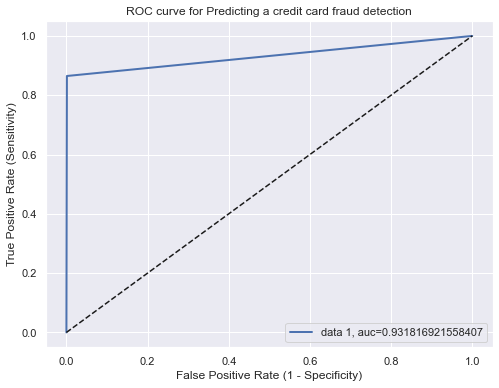

In [51]:
# plot ROC Curve with SMOTE Oversampling

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_final_adasyn_pred)

auc = metrics.roc_auc_score(y_test, y_final_adasyn_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.672


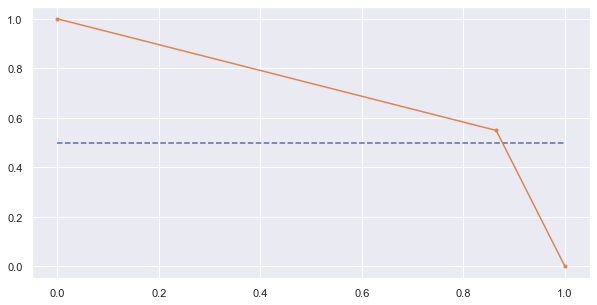

In [52]:
# calculate precision-recall curve with SMOTE Oversampling
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_final_adasyn_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_final_adasyn_pred)
print('f1=%.3f' % (f1))

# plot no skill
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 14
3rd Top var = 10


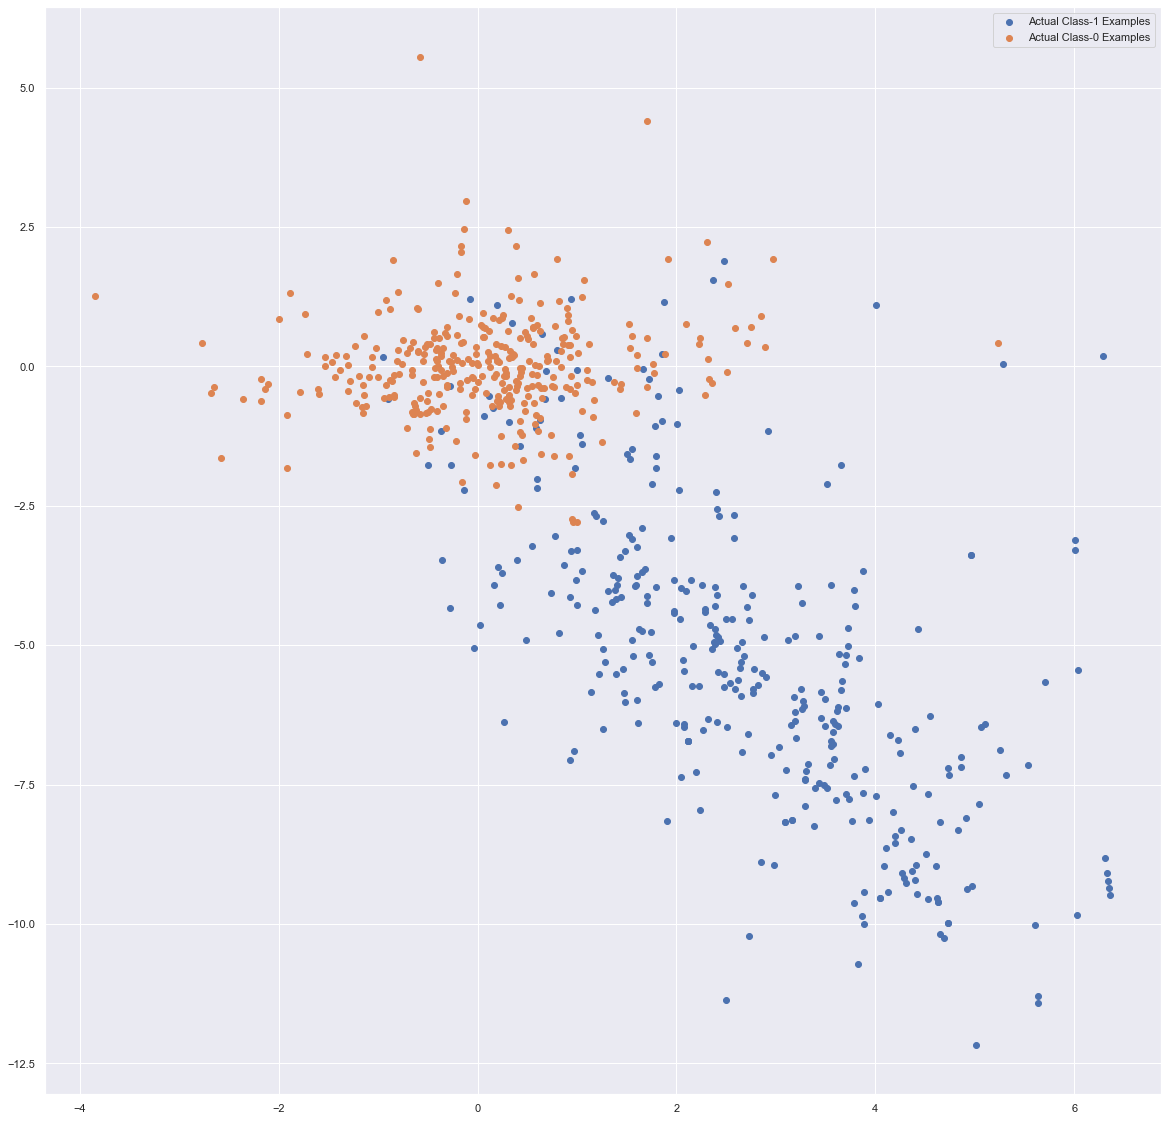

In [55]:
var_imp = []
clf_adasyn = clf_adasyn.best_estimator_
for i in clf_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_adasyn.feature_importances_)[-2])

X_train_1_adasyn = X_train_adasyn[np.where(y_train==1.0)]
X_train_0_adasyn = X_train_adasyn[np.where(y_train==0.0)]

np.random.shuffle(X_train_0_adasyn)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1_adasyn[:, top_var_index], X_train_1_adasyn[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0_adasyn[:X_train_1_adasyn.shape[0], top_var_index], X_train_0_adasyn[:X_train_1_adasyn.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### XG Boost without Sampling
- Accuracy :0.99960
- AUC : 0.90537
- Precision : 0.95238
- Recall : 0.81081
- F1 : 0.87591

#### XG Boost with Sampling
- Accuracy :0.99854
- AUC : 0.93182
- Precision : 0.54936
- Recall : 0.86486
- F1 : 0.67192

## Conclusion

- We consider XGBoost provide best accuracy, although we can see Logistic also had better accuracy, but if we cross check other evaluation metrics they were not good.
- We did find that RandomUnderSampling provide great accuracy, but it is calculated with less number of data. Since this is financial matter model should be train on plenty on dataset. 
- We can observe that with sampling AUC score rise but other score got decrease
- Without sampling all score are nearbout on the avaerage toward apprx 89%
- Accuracy can be more increase if we would have dropped some data as well. Although 89-90% is not fair accuracy with full data.
